## **1. Descripción del conjunto de datos**


In [ ]:
#Importamos librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
#Montamos el drive
from google.colab import drive
drive.mount('/content/drive')

#Directorio donde tenemos el fichero de datos en el Drive
path_file = '/content/drive/My Drive/ProyectoTD/full_format_recipes.json'

#Leemos los datos
datos = pd.read_json(path_file)

Mounted at /content/drive


El conjunto de datos proporcionado consta de 20130 entradas correspondientes a recetas sacadas de la web www.epicurious.com, conteniendo para cada una la siguiente información:

In [ ]:
#Mostramos los datos de algunos documentos
datos.head()

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
0,"[1. Place the stock, lentils, celery, carrot, ...",7.0,2006-09-01 04:00:00+00:00,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",426.0,None,30.0,2.500,"Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock,...",559.0
1,[Combine first 9 ingredients in heavy medium s...,23.0,2004-08-20 04:00:00+00:00,"[Food Processor, Onion, Pork, Bake, Bastille D...",403.0,This uses the same ingredients found in boudin...,18.0,4.375,Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, c...",1439.0
2,[In a large heavy saucepan cook diced fennel a...,7.0,2004-08-20 04:00:00+00:00,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",165.0,None,6.0,3.750,Potato and Fennel Soup Hodge,"[1 fennel bulb (sometimes called anise), stalk...",165.0
3,[Heat oil in heavy large skillet over medium-h...,NaN,2009-03-27 04:00:00+00:00,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",NaN,The Sicilian-style tomato sauce has tons of Me...,NaN,5.000,Mahi-Mahi in Tomato Olive Sauce,"[2 tablespoons extra-virgin olive oil, 1 cup c...",NaN
4,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.0,2004-08-20 04:00:00+00:00,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",547.0,None,20.0,3.125,Spinach Noodle Casserole,"[1 12-ounce package frozen spinach soufflé, th...",452.0


In [ ]:
#Mostramos las columnas que tienen los datos
print(datos.columns)

Index(['directions', 'fat', 'date', 'categories', 'calories', 'desc',
       'protein', 'rating', 'title', 'ingredients', 'sodium'],
      dtype='object')




*   ***directions:*** Instrucciones para hacer la receta
*   ***categories:*** Categorias asignadas al plato


*   ***desc:*** Descripción de la receta
*   ***title:*** Título


*   ***rating:*** Puntuación dada por los usuarios
*   ***fat:*** Cantidad de grasa (en gramos)


*   ***protein:*** Cantidad de proteínas (en gramos)
*   ***calories:*** Cantidad de calorías (en gramos)


*   ***sodium:*** Cantidad de sodio (en gramos)
*   ***ingredients:*** Cantidad de cada ingrediente


*   ***date:*** Fecha de publicación
















In [ ]:
#Almacenamos sus valores en variables distintas
directions = datos['directions'] #Contiene texto
fat = datos['fat']
date = datos['date']
categories = datos['categories'] #Contiene texto
calories = datos['calories']
desc = datos['desc'] #Contiene texto
protein = datos['protein']
rating = datos['rating'] #Variable de salida para solucionar el problema de regresion
title = datos['title'] #Contiene texto
ingredients = datos['ingredients']
sodium = datos['sodium']

## **2. Desarrollo del proyecto**


El proyecto a desarrollar consiste en resolver una tarea de regresión, mediante la comparación de las prestaciones obtenidas al utilizar distintas vectorizaciones de los documentos. Se emplearán dos estrategias diferentes de aprendizaje automático.

### **2.1. Análisis de variables de entrada**

El primer apartado consiste en analizar la relación entre distintas variables. En este caso va a ser la variable de salida (*rating*) con algunas de las categorías contenidas en la variable *categories*, con el objetivo de explicar su relevancia en el problema.

A continuación se muestran algunos análisis realizados:

In [ ]:
#Identificamos las categorias mas comunes
frec_cat = datos['categories'].value_counts()

#Mostramos por pantalla
print(frec_cat)

categories
[]                                                                                                                                                                                        59
[Bon Appétit]                                                                                                                                                                             14
[Gourmet]                                                                                                                                                                                 11
[Bread, Bake, Winter, Gourmet]                                                                                                                                                             8
[Soup/Stew, Fish]                                                                                                                                                                          7
                                            

<Axes: title={'center': 'Rating'}, ylabel='Frequency'>

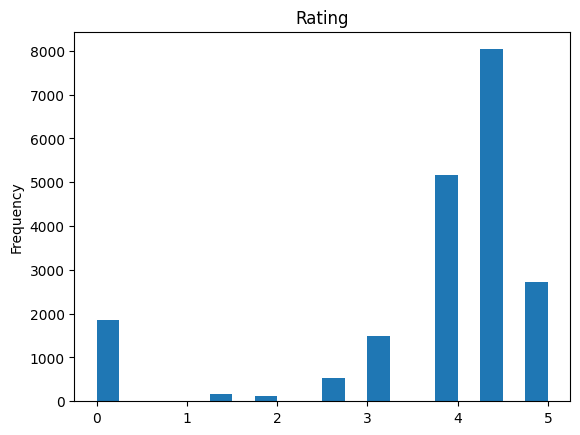

In [ ]:
#Representamos gráficamente la columna de ratings en forma de histograma
datos['rating'].plot(kind='hist', bins=20, title='Rating')

Analizando la gráfica anterior es posible observar que los ratings que más aparecen son los de 4.5, mientras que hay valores de ratings inexistentes como por ejemplo 1.

categories
Mortar and Pestle    5.0
#WasteLess           5.0
Emeril Lagasse       5.0
Suzanne Goin         5.0
Rub                  5.0
                    ... 
Camping              0.0
Waffle               0.0
Caviar               0.0
Quiche               0.0
Sorbet               0.0
Name: rating, Length: 674, dtype: float64


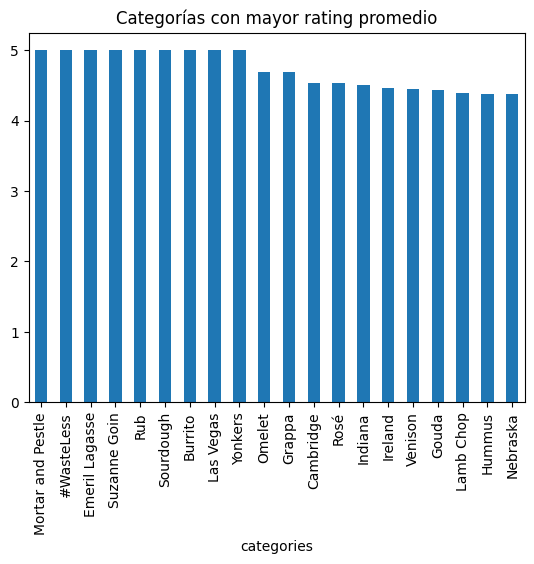

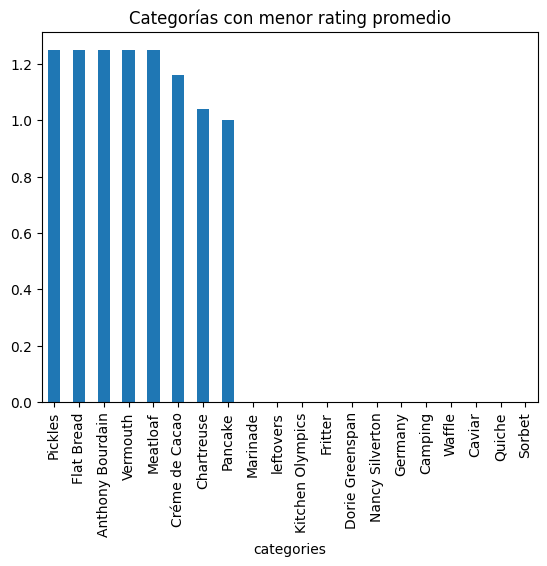

In [ ]:
#Calculamos el promedio del rating para cada categoria
datos_exp = datos.explode('categories') # pone a cada elemento en una fila distinta
avg_rating = datos_exp.groupby('categories')['rating'].mean() # sacamos el valor medio del rating de cada categoría

#Ordenamos de mayor a menor rating
avg_rating_ordenado = avg_rating.sort_values(ascending=False)
print(avg_rating_ordenado)

#Representamos gráficamente las 20 primeras categorias
avg_rating_ordenado[:20].plot(kind='bar', title='Categorías con mayor rating promedio')
plt.show()

avg_rating_ordenado[-20:].plot(kind='bar', title='Categorías con menor rating promedio')
plt.show()

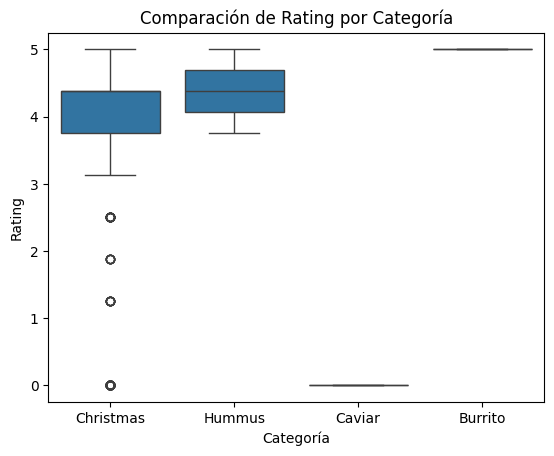

In [ ]:
#Seleccionamos algunas categorias y comparamos sus ratings
import seaborn as sns

#Categorías a comparar:
cat_selec = ['Burrito', 'Caviar', 'Christmas', 'Hummus']

#De todo el conjunto de datos nos quedamos solo con las categorías seleccionadas
datos_selec = datos_exp[datos_exp['categories'].isin(cat_selec)]

#Representamos gráficamente
sns.boxplot(x='categories', y='rating', data=datos_selec)
plt.title('Comparación de Rating por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Rating')
plt.show()

Analizando los resultados obtenidos es posible comentar el funcionamiento de boxplot. La caja azul muestra la dispersión de los datos entre el 25% y el 75% de los valores, significando que cuanto menor tamaño tenga la caja menos variabilidad van a tener los datos (que en este caso son los ratings).
La línea horizontal indica la mediana (valor central de los datos). Los bigotes muestran el valor más alto y más bajo que puede tomar la variable y que se consideran dentro de lo normal. Mientras que los puntos que se muestran son outliers, que representan valoraciones puntuales que se han realizado y que están alejados de la media.

In [ ]:
#Calculamos la media de las categorias
avg_rating = datos_exp.groupby('categories')['rating'].mean()

#Calculamos la frecuencia de las categorias
frec_cat = datos_exp['categories'].value_counts() #--> VER POR QUE ESTO SALE DISTINTO A LO DE ANTES

#Mostramos el número de veces que aparecen
print(frec_cat)


categories
Bon Appétit      9355
Peanut Free      8390
Soy Free         8088
Tree Nut Free    7044
Vegetarian       6846
                 ... 
Aspen               1
Beverly Hills       1
Yonkers             1
West Virginia       1
Sourdough           1
Name: count, Length: 674, dtype: int64


In [ ]:
#Combinamos la frecuencia con la media obtenida del rating
datos_frec_media = pd.DataFrame({'Frecuencia': frec_cat, 'Media': avg_rating})

#Mostramos las categorías con mayor media para ver la frecuencia de aparición
importancia_ordenada_media = datos_frec_media.sort_values(by=['Media', 'Frecuencia'], ascending=[False, False])
print(importancia_ordenada_media.head(20)) #Solo se han mostrado los 20 primeros para reducir el coste computacional

#Mostramos las categorías con mayor frecuencia para ver su media
importancia_ordenada_frecuencia = datos_frec_media.sort_values(by=['Frecuencia', 'Media'], ascending=[False, False])
print(importancia_ordenada_frecuencia.head(20))


                   Frecuencia     Media
categories                             
Rub                         3  5.000000
Mortar and Pestle           2  5.000000
#WasteLess                  1  5.000000
Burrito                     1  5.000000
Emeril Lagasse              1  5.000000
Las Vegas                   1  5.000000
Sourdough                   1  5.000000
Suzanne Goin                1  5.000000
Yonkers                     1  5.000000
Grappa                      4  4.687500
Omelet                      2  4.687500
Cambridge                   4  4.531250
Rosé                        4  4.531250
Indiana                     5  4.500000
Ireland                    14  4.464286
Venison                     9  4.444444
Gouda                      10  4.437500
Lamb Chop                  45  4.388889
Buffalo                     8  4.375000
Persian New Year            4  4.375000
                   Frecuencia     Media
categories                             
Bon Appétit              9355  3.893038


Analizando los resultados anteriores se pueden ver que las categorias que aparecen con menor frecuencia suelen tener una media de rating mayor. Esto tiene sentido porque tienen pocas valoraciones y por tanto si todas son buenas el rating final va a ser alto. En cambio, si ordenamos las categorias por frecuencia, poniendo primero aquellas categorias que aparecen mas veces vemos que el rating disminuye a 3.8 aproximadamente, esto tambien tiene sentido debido a que al tener tantas valoraciones algunas van a ser buenas y otras malas, entonces estas últimas lo que hacen es disminuir el valor de rating medio de la categoria.

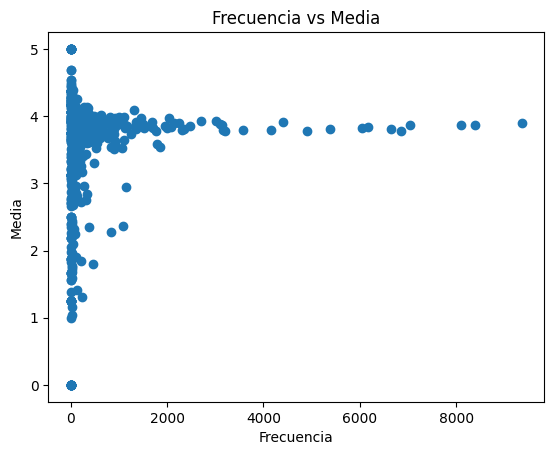

In [ ]:
#Representamos graficamente la frecuencia y la media
plt.scatter(datos_frec_media['Frecuencia'], datos_frec_media['Media'])
plt.title('Frecuencia vs Media')
plt.xlabel('Frecuencia')
plt.ylabel('Media')
plt.show()

In [ ]:
#Comparamos si la media de rating difiere del promedio general

#Calculamos el rating promedio general
rating_general = datos['rating'].mean()
print(f'Media general del rating: {rating_general}')

#Calculamos el rating para ciertas categorias
for categ in ['Winter', 'Omelet', 'Peanut Free']:
  rating_categ = datos_exp[datos_exp['categories'].isin([categ])]['rating'].mean()
  print(categ, rating_categ)

Media general del rating: 3.7130597014925373
Winter 3.8873426911907067
Omelet 4.6875
Peanut Free 3.8663587604290823


In [ ]:
# Elegimos categoría más frecuente entre 100 recetas y comparamos rating

# Se eligen 100 recetas
recetas_seleccionadas = datos.sample(n=100, random_state=42)

# Encontramos categoría más frecuente
recetas_seleccionadas['most_frequent_category'] = recetas_seleccionadas['categories'].apply(most_frequent_category)
mas_frecuente_en_muestra = recetas_seleccionadas['most_frequent_category'].value_counts().idxmax()

# Seleccionamos las recetas que tienen esta categoría
recetas_contienen_categoria = recetas_seleccionadas[recetas_seleccionadas['most_frequent_category'] == mas_frecuente_en_muestra]

# Representamos rating de estas recetas
plt.figure(figsize=(10, 6))
sns.barplot(x='title', y='rating', data=recetas_contienen_categoria)
plt.title(f"Rating de las recetas que contienen la categoría: {mas_frecuente_en_muestra}")
plt.xlabel("Recetas")
plt.ylabel("Rating")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Distribución de rating para la categoría más frecuente
plt.figure(figsize=(8, 5))
sns.histplot(recetas_contienen_categoria['rating'], bins=10)
plt.title(f"Distribución de rating para categoría: {mas_frecuente_en_muestra}")
plt.xlabel("Rating")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

### **2.2. Implementación de un pipeline para el preprocesado de textos**###

Un pipeline de preprocesado de texto es un conjunto de pasos secuenciales que transforman el texto original en una forma que puede ser utilizada eficientemente por algoritmos de aprendizaje automatico. Su objetivo principal es limpiar, normalizar y estructurar el texto, eliminando así informacion irrelevante.

Se suele usar un pipeline por varias razones:

- ***Estandarización:*** para que todos los textos se procesen de la misma forma

- ***Reutilización:*** se puede aplicar a conjuntos de texto nuevos.

Algunas funcionalidades básicas son:

*   Eliminar caracteres innecesarios (puntuación, números o espacio en blanco extras).
*   Conversión a minúsculas.


*   Tokenizar el texto, es decir, dividir el texto en palabras individuales.
*   Eliminar stopwords, que son palabras que no aportan mucho significado, como por ejemplo: y, el, de.


In [ ]:
#Utilizamos SpaCy

#Importamos las librerías necesarias
import spacy
import unicodedata
import re

#Cargamos el modelo de lenguaje
nlp = spacy.load('en_core_web_sm')

#Funcion para quitar las tildes
def remove_accents(text):
  #Comprobamos si el texto es None -> Hacemos esto para que no de error en la ejecucción
  if text is None:
    return '' #Se devuelve un campo vacío
  return ''.join(char for char in unicodedata.normalize('NFD', text) if unicodedata.category(char) != 'Mn') #Separa á en a + ´, y ya luego elimina la tilde y solo se queda con a

#Definimos la funcion de preprocesamiento
def preprocess_text_spacy(text):
  if text is None:
    return ''
  if isinstance(text, (int,float)): #Si tenemos un numero que lo pase a string
    text = str(text)
  if isinstance(text, list):
    text = ' '.join(text)

  #Pasamos el texto a minúsculas
  text = text.lower()

  #Eliminamos las tíldes
  text = remove_accents(text)

  text_proc = nlp(text)

  #Eliminamos las palabras irrelevantes
  tokens = [token.lemma_ for token in text_proc if not token.is_stop and not token.is_punct]
  return ' '.join(tokens)



In [ ]:
#Aplicamos la funcion de preprocesamiento a las columnas de texto
datos['directions_proc_spacy'] = datos['directions'].apply(preprocess_text_spacy) #tarda mas de 10 minutos
datos['desc_proc_spacy'] = datos['desc'].apply(preprocess_text_spacy) #tarda 3 minutos

In [ ]:
#Mostramos por pantalla
print("Columna directions")
print(datos['directions_proc_spacy'])

print("Columna description")
print(datos['desc_proc_spacy'])


Columna directions
0        1 place stock lentil celery carrot thyme salt ...
1        combine 9 ingredient heavy medium saucepan add...
2        large heavy saucepan cook diced fennel onion b...
3        heat oil heavy large skillet medium high heat ...
4        preheat oven 350 ° f lightly grease 8x8x2 inch...
                               ...                        
20125    beat white bowl electric mixer hold stiff peak...
20126    bring broth simmer saucepan.remove heat cover ...
20127    sharp knife cut shallow x tomato immerse sauce...
20128    heat 2 tablespoon oil heavy medium skillet med...
20129    position rack oven preheat 325 ° f place ham r...
Name: directions_proc_spacy, Length: 20130, dtype: object
Columna description
0                                                         
1        use ingredient find boudin blanc classic frenc...
2                                                         
3        sicilian style tomato sauce ton mediterranean ...
4                 

### **2.3. Representación vectorial de los documentos**

Tenemos que realizar la representacion vectorial mediante tres procedimientos diferentes:

1.   **TF-IDF:** asigna un peso a cada palabra en un documento considerando:

      - Con que frecuencia aparece la palabra en el documento
      - Que tan rara es esa palabra en todo el conjunto

  Tiene ciertas ventajas, puesto que resalta palabras importantes e ignora palabras comunes (que aparecen en muchos documentos).
  También presenta desventajas ya que no considera el orden ni el contexto de las palabras.

2.   **Word2Vec:** aprende representaciones vectoriales densas para las palabras, capturando relaciones semánticas entre ellas.

  El resultado de todo esto es un vector denso para cada palabra, donde palabras que tienen significados similares están situados cerca en el espacio vectorial. Se puede emplear para representar un documento mediante el promedio de los vectores de las palabras que contiene.

  Sus ventajas son que es capaz de capturar relaciones semánticas y contextuales entre palabras. Las desventajas es que no tiene en cuenta el orden completo ni el contexto general y requiere entenamientos grandes para obtener buenos resultados.



   

3.   **Embeddings contextuales calculados a partir de modelos basados en
transformers(BERT, RoBERTa, etc):** su funcionamiento es entender palabras en el contexto completo, mediante el análisis de todas las palabras del texto simultaneamente.

 A diferencia de Word2Vec, aqui se generan vectores diferentes para una misma palabra dependiendo del contexto. Funciona mediante transformers, los cuales emplean mecanismos para analizar las relaciones entre todas las palabras del texto. También es posible entrenar los modelo para completar frases o predecir palabras faltantes.

 Sus ventajas son que capturan el significado contextual de las palabras y son precisos en tareas complejas. La desventaja principal es que son computacionalmente costosos y más difíciles de interpretar.


#### TF-IDF

In [ ]:
#TF-IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#Calculamos TF: frecuencia con la que una palabra aparece en un documento con respecto al total de palabras
countVect_desc = CountVectorizer()
countVect_directions = CountVectorizer()

matriz_desc_tf = countVect_desc.fit_transform(datos['desc_proc_spacy'])
matriz_directions_tf = countVect_directions.fit_transform(datos['directions_proc_spacy'])

#Calculamos IDF: rareza de una palabra en el corpus completo
idf = TfidfTransformer()
idf2 = TfidfTransformer()
matriz_desc_idf = idf.fit(matriz_desc_tf)
matriz_directions_idf = idf2.fit(matriz_directions_tf)

#Calculamos la matriz TF-IDF
matriz_desc_tfidf = matriz_desc_idf.transform(matriz_desc_tf)
matriz_directions_tfidf = matriz_directions_idf.transform(matriz_directions_tf)


In [ ]:
import scipy.sparse
scipy.sparse.save_npz('/content/drive/My Drive/ProyectoTD/matriz_desc_tfidf.npz', matriz_desc_tfidf)


In [ ]:
#Mostramos por pantalla
print('Resultado TF-IDF para columna DESC:')
print(matriz_desc_tfidf)
print('')
print('Resultado TF-IDF para columna DIRECTIONS:')
print(matriz_directions_tfidf)

Resultado TF-IDF para columna DESC:
  (1, 1429)	0.36474270400167513
  (1, 1592)	0.5262436372697519
  (1, 2499)	0.23027205699839964
  (1, 3256)	0.22692728422076194
  (1, 4419)	0.2436296441956205
  (1, 4711)	0.2763285164294596
  (1, 5944)	0.252828944679405
  (1, 10239)	0.29926529762938464
  (1, 10463)	0.17723323375494857
  (1, 11149)	0.23982777706714084
  (1, 12444)	0.2014242390666182
  (1, 12810)	0.2584829385334707
  (3, 4496)	0.16082150058765157
  (3, 7353)	0.30891384091682533
  (3, 8190)	0.2468420527010611
  (3, 8254)	0.2439076469086529
  (3, 8266)	0.3553280897532708
  (3, 8637)	0.2824320181589068
  (3, 10227)	0.18192266296409715
  (3, 10638)	0.38507475427167254
  (3, 11336)	0.2583266664225988
  (3, 11791)	0.3152327381822983
  (3, 11972)	0.2209788196159265
  (3, 11981)	0.39490054720705486
  (5, 202)	0.5424652171042187
  :	:
  (20128, 12150)	0.19531143673266835
  (20128, 12947)	0.14926119575549462
  (20129, 1068)	0.20816685167208646
  (20129, 2539)	0.22809059976312276
  (20129, 2837)	0

In [ ]:
#Mostramos palabras con su peso

#Cada fila de la matriz representa un documento
num_doc = 22
doc_desc_tfidf = matriz_desc_tfidf[num_doc].toarray().flatten()
doc_directions_tfidf = matriz_directions_tfidf[num_doc].toarray().flatten()


#Seleccionamos las palabras que tengan mas peso en el documento que estamos analizando
#Primero seleccionamos los indices
most_important_idx_desc = np.argsort(doc_desc_tfidf)[-15:]
most_important_idx_directions = np.argsort(doc_directions_tfidf)[-15:]

#Extraemos cada palabra
voc = countVect_desc.get_feature_names_out()
voc2 = countVect_directions.get_feature_names_out()

most_important_words_desc = [voc[i] for i in most_important_idx_desc]
most_important_words_directions = [voc2[j] for j in most_important_idx_directions]

#Obtenemos los pesos asociados a cada palabra
most_important_weights_desc = doc_desc_tfidf[most_important_idx_desc]
most_important_weights_directions = doc_directions_tfidf[most_important_idx_directions]


In [ ]:
#Mostramos por pantalla
print('Palabras con mayor peso en un documento para DESC:')
for word, weight in zip(most_important_words_desc, most_important_weights_desc):
  print(word, weight)

print('')

print('Palabras con mayor peso en un documento para DIRECTIONS:')
for word2, weight2 in zip(most_important_words_directions, most_important_weights_directions):
  print(word2, weight2)

Palabras con mayor peso en un documento para DESC:
feudal 0.0
festival 0.0
fettuccine 0.0
fettucine 0.0
feu 0.0
flavor 0.1674269039560916
fish 0.23053757939433075
course 0.25223988833960065
main 0.2702221369548551
steam 0.2988334599946228
asparagus 0.31861514840753613
individual 0.3374446621540571
paper 0.34780487895611883
delicately 0.4150635620021752
packet 0.429236237749871

Palabras con mayor peso en un documento para DIRECTIONS:
space 0.11350612342190258
slide 0.11908811257643105
tarragon 0.1196855534952048
enclose 0.12009237078709521
crimp 0.12694199611041382
half 0.12963350709217394
17 0.1411289237224277
butter 0.15595865859166502
fold 0.16139922454767888
square 0.2152345681924777
asparagus 0.2572890192885706
parchment 0.28600204691089726
packet 0.3110255709461883
fillet 0.3627826360232473
fish 0.4887037991505015


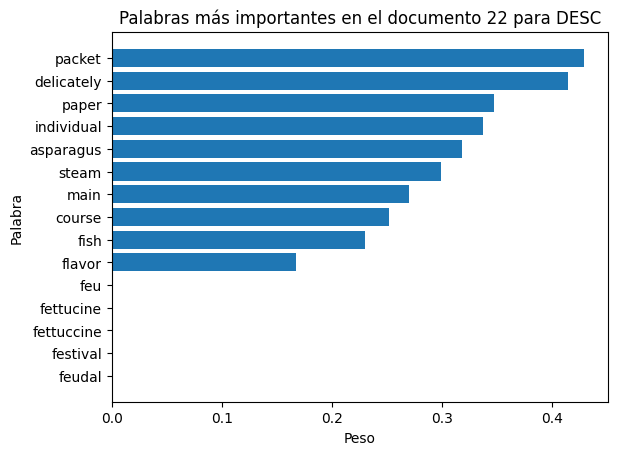

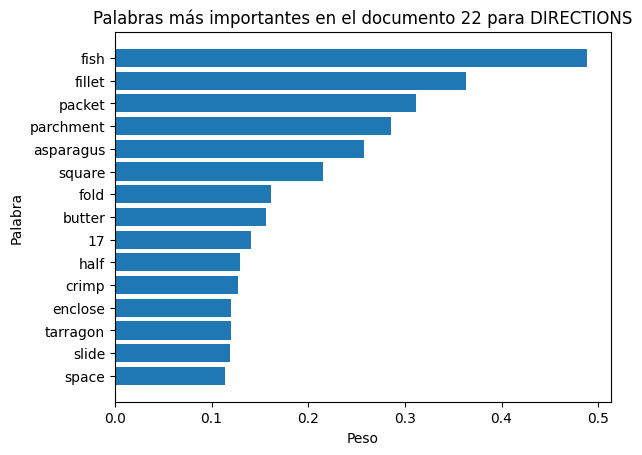

In [ ]:
#Representamos gráficamente
plt.barh(most_important_words_desc, most_important_weights_desc)
plt.xlabel('Peso')
plt.ylabel('Palabra')
plt.title('Palabras más importantes en el documento 22 para DESC')
plt.show()

plt.barh(most_important_words_directions, most_important_weights_directions)
plt.xlabel('Peso')
plt.ylabel('Palabra')
plt.title('Palabras más importantes en el documento 22 para DIRECTIONS')
plt.show()

In [ ]:
#Realizamos comparaciones entre documentos
from sklearn.metrics.pairwise import cosine_similarity

#Calculamos la similitud
similar = cosine_similarity(matriz_desc_tfidf)
sim_doc = similar[1]

#Calculamos la similitud del documento 1 con el resto
print(sim_doc)

#Ordenamos de mayor a menor
docs_similar_idx = np.argsort(sim_doc)[::-1][0:10]
valores_similar = sim_doc[docs_similar_idx]

print(docs_similar_idx)


[0.         1.         0.         ... 0.         0.01666153 0.        ]
[    1 14812 17264 19034   582 19652  7596 16123  2810 13427]


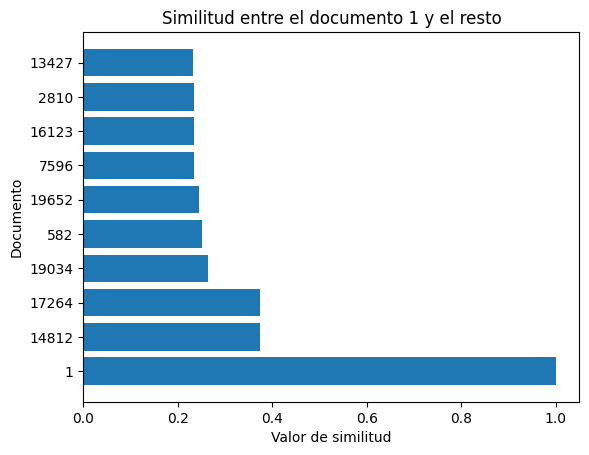

In [ ]:
plt.barh(range(10), valores_similar)
plt.yticks(range(10), docs_similar_idx)
plt.xlabel('Valor de similitud')
plt.ylabel('Documento')
plt.title('Similitud entre el documento 1 y el resto')
plt.show()

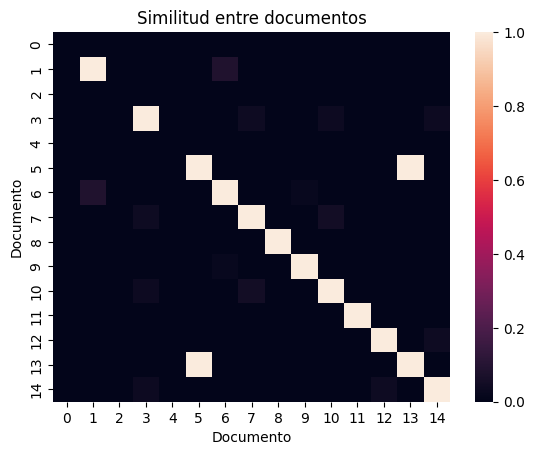

In [ ]:
#Representamos gráficamente
import seaborn as sns
sns.heatmap(similar[:15, :15])
plt.xlabel('Documento')
plt.ylabel('Documento')
plt.title('Similitud entre documentos')
plt.show()

#### Word2Vec

In [ ]:
#WORD2VEC
from gensim.models import Word2Vec

#Tokenizamos cada documento
desc_token = [doc.split() for doc in datos['desc_proc_spacy']]
directions_token = [doc.split() for doc in datos['directions_proc_spacy']]

#Entrenamos el modelo
w2v_desc = Word2Vec(sentences = desc_token, vector_size = 500, window = 5, min_count = 2) #sentences: textos divididos en palabras
                                                                                          #vector_size: dimension de los vectores
                                                                                          #window: palabras a considerar alrededor de la central
                                                                                          #min_count: ignoramos las palabras que aparecen menos de 2 veces

w2v_directions = Word2Vec(sentences = directions_token, vector_size = 100, window = 5, min_count = 2)

In [ ]:
#Calculamos el promedio de los vectores de sus palabras
def avg_vec(doc, model, vector_size=500):
  words = [model.wv[word] for word in doc if word in model.wv]
  if not words:
    return np.zeros(vector_size)
  result = np.mean(words, axis=0)
  return result

#Aplicamos la funcion a cada uno de los documentos
desc_vec = np.array([avg_vec(doc, w2v_desc) for doc in desc_token])
directions_vec = np.array([avg_vec(doc, w2v_directions) for doc in directions_token])


In [ ]:
print(desc_vec)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.24968697  0.28071541  0.19700886 ... -0.30845958 -0.24360737
  -0.17868131]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.18202698  0.2210952   0.15182038 ... -0.22881027 -0.16742979
  -0.13618846]
 [ 0.17288794  0.22374153  0.1371644  ... -0.21265008 -0.16074339
  -0.15230072]]


In [ ]:
print(desc_vec.shape)

(20130, 500)


In [ ]:
#Analizamos los resultados

#Observamos la similitud entre palabras
print(w2v_desc.wv.most_similar("white", topn=10))
print(w2v_directions.wv.most_similar("white", topn=10))

[('sprinkle', 0.9918085932731628), ('blanched', 0.9902530312538147), ('cayenne', 0.990227460861206), ('tangy', 0.9900884628295898), ('combination', 0.9889419078826904), ('balance', 0.988808810710907), ('oregano', 0.9887291193008423), ('crunchy', 0.9883459210395813), ('balsamic', 0.9882618188858032), ('mint', 0.9882504343986511)]


In [ ]:
#Similitud entre documentos
from sklearn.metrics.pairwise import cosine_similarity

similar_w2v_desc = cosine_similarity(desc_vec) #Lo hacemos con variable desc porque tiene menos coste computacional
doc_w2v_desc = similar_w2v_desc[1]

#Calculamos la similitud del documento 1 con el resto
print(doc_w2v_desc)

#Ordenamos de mayor a menor
idx_w2v_desc = np.argsort(doc_w2v_desc)[::-1][0:20]
valores_w2v_desc = doc_w2v_desc[idx_w2v_desc]

print(idx_w2v_desc)

[0.         1.         0.         ... 0.         0.99619582 0.9886139 ]
[    1  4300  2449 16140  9600 15465  9092 18797  4030  6697  5475 19169
 13497 19917  8798 14396  4561  3694 20128 14534]


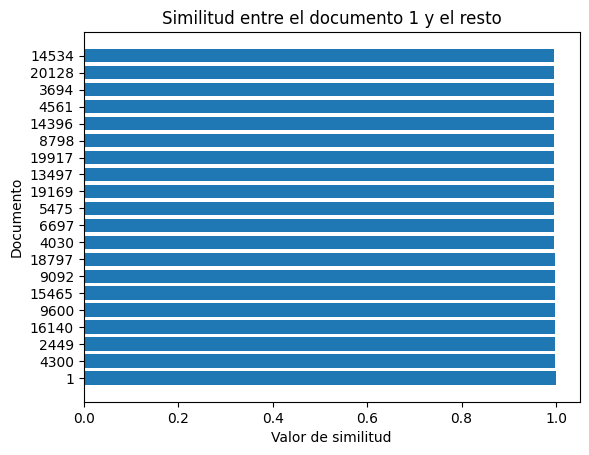

In [ ]:
plt.barh(range(20), valores_w2v_desc)
plt.yticks(range(20), idx_w2v_desc)
plt.xlabel('Valor de similitud')
plt.ylabel('Documento')
plt.title('Similitud entre el documento 1 y el resto')
plt.show()

Tiene sentido que los documentos tengan ahora mayor similitud entre sí debido a que Word2Vec en cierta medida tiene en cuenta el contexto de las palabras. En nuestro caso como estamos trabajando con recetas el contexto es el mismo y por lo tanto la similitud aumenta.

In [ ]:
#Identificamos las palabras con mayor peso
voc_w2v = w2v_desc.wv.key_to_index

#Calculamos la frecuencia de las palabras de todos los documentos
frec_w2v = [w2v_desc.wv.get_vecattr(word, "count") for word in voc_w2v]

#Mostramos por pantalla
print('')
print(frec_w2v)

#Ordenamos las palabras en función de su frecuencia y mostramos su nombre
words_ordenadas = sorted(voc_w2v, key=lambda word: w2v_desc.wv.get_vecattr(word, "count"))
print(words_ordenadas)



[2437, 1928, 1847, 1667, 1360, 1349, 1211, 1204, 1202, 1162, 1070, 1053, 1002, 999, 967, 966, 961, 935, 918, 907, 803, 769, 750, 742, 721, 713, 706, 701, 700, 680, 633, 632, 628, 608, 590, 587, 578, 574, 572, 566, 528, 528, 525, 521, 517, 510, 505, 490, 487, 484, 480, 477, 471, 469, 466, 463, 462, 459, 454, 453, 452, 452, 449, 448, 447, 446, 443, 438, 433, 432, 426, 425, 419, 418, 417, 414, 413, 402, 398, 392, 389, 387, 387, 387, 383, 382, 376, 376, 376, 372, 365, 365, 364, 359, 359, 357, 355, 352, 351, 349, 346, 343, 343, 337, 336, 335, 332, 331, 330, 324, 323, 321, 320, 319, 317, 315, 314, 313, 310, 310, 306, 304, 304, 302, 299, 298, 295, 294, 292, 290, 289, 288, 285, 282, 281, 281, 280, 279, 278, 278, 275, 274, 272, 269, 269, 269, 263, 262, 261, 260, 259, 254, 252, 252, 249, 249, 248, 247, 246, 245, 245, 244, 242, 240, 239, 238, 238, 236, 235, 233, 232, 231, 231, 230, 229, 229, 229, 229, 228, 228, 228, 227, 227, 226, 225, 224, 224, 221, 221, 220, 219, 218, 216, 214, 213, 213, 213, 

#### Embeddings contextuales

In [ ]:
#EMBEDDINGS CONTEXTUALES
#Calculados a partir de modelos basados en transformers
!pip install transformers

In [ ]:
import torch
from transformers import BertTokenizer, BertModel

#Cargamos el modelo y el tokenizador
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
BERT_model = BertModel.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
print(datos['desc'].head(5))

0                                                 None
1    This uses the same ingredients found in boudin...
2                                                 None
3    The Sicilian-style tomato sauce has tons of Me...
4                                                 None
Name: desc, dtype: object


In [ ]:
#Tokenizamos cada documento en un formato compatible con BERT

#Creamos una funcion que añadan los tokens al texto
def add_tokens(text):
  if text is None:
    text = ''
  elif isinstance(text, (int, float)):
    text = str(text)
  elif isinstance(text, list):
    text = ' '.join(text)

  marked_text = "[CLS] " + text + " [SEP]"
  tokens = tokenizer.tokenize(marked_text)

  return tokens


In [ ]:
#Añadimos los tokens [CLS] y [SEP]
datos['desc_bert'] = datos['desc'].apply(add_tokens)
datos['directions_bert'] = datos['directions'].apply(add_tokens)

#Comprobamos si el resultado es bueno
print(datos['desc_bert'])
print(datos['directions_bert'])


Para el siguiente paso se ha tenido que disminuir el número de datos con los que trabajamos debido a que el modelo BERT tiene una longitud máxima de secuencia de entrada de 512, y si utilizamos todos nuestros datos se sobrepasa este límite y se produce un error.

In [ ]:
#Convertimos las frases de una lista de strings a una lista de indices
tokens_desc = [token for sublist in datos['desc_bert'][:10] for token in sublist]
index_desc = tokenizer.convert_tokens_to_ids(tokens_desc)

tokens_directions = [token2 for sublist2 in datos['directions_bert'][:1] for token2 in sublist2]
index_directions = tokenizer.convert_tokens_to_ids(tokens_directions)

#Mostramos por pantalla la palabra y el indice asociado
print('Columna DESC:')
for tup in zip(datos['desc_bert'][1], index_desc): #Mostramos por pantalla solo el documento 1
  print('{:<12} {:>6}'.format(tup[0], tup[1]))

print('Columna DIRECTIONS:')
for tup in zip(datos['directions_bert'][1], index_directions): #Mostramos por pantalla solo el documento 1
  print('{:<12} {:>6}'.format(tup[0], tup[1]))

In [ ]:
#Determinamos la sentencia a la que pertenece
ids_desc = [1]*len(datos['desc_bert'])
ids_directions = [1]*len(datos['directions_bert'])


In [ ]:
#Extraemos los embeddings

#Convertimos los datos a tensores torch para que funcione la interfaz
index_desc_tensor = torch.tensor([index_desc])
ids_desc_tensor = torch.tensor([ids_desc])

index_directions_tensor = torch.tensor([index_directions])
ids_directions_tensor = torch.tensor([ids_directions])


In [ ]:
#Cargamos el modelo preentrenado
BERT_model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states = True)

#Lo evaluamos
BERT_model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [ ]:
#Evaluamos el BERT en nuestro texto
with torch.no_grad():

  #Obtenemos los embeddings
  outputs_desc = BERT_model(index_desc_tensor, ids_desc_tensor)
  hidden_states_desc = outputs_desc[2]

  outputs_directions = BERT_model(index_directions_tensor, ids_directions_tensor)
  hidden_states_directions = outputs_directions[2]



In [ ]:
print('DESC')
print ("Number of layers:", len(hidden_states_desc), "  (initial embeddings + 12 BERT layers)")
layer_i = 0

print ("Number of batches:", len(hidden_states_desc[layer_i]))
batch_i = 0

print ("Number of tokens:", len(hidden_states_desc[layer_i][batch_i]))
token_i = 0

print ("Number of hidden units:", len(hidden_states_desc[layer_i][batch_i][token_i]))


print('DIRECTIONS')
print ("Number of layers:", len(hidden_states_directions), "  (initial embeddings + 12 BERT layers)")
layer_i = 0

print ("Number of batches:", len(hidden_states_directions[layer_i]))
batch_i = 0

print ("Number of tokens:", len(hidden_states_directions[layer_i][batch_i]))
token_i = 0

print ("Number of hidden units:", len(hidden_states_directions[layer_i][batch_i][token_i]))

DESC
Number of layers: 13   (initial embeddings + 12 BERT layers)
Number of batches: 1
Number of tokens: 172
Number of hidden units: 768
DIRECTIONS
Number of layers: 13   (initial embeddings + 12 BERT layers)
Number of batches: 1
Number of tokens: 219
Number of hidden units: 768


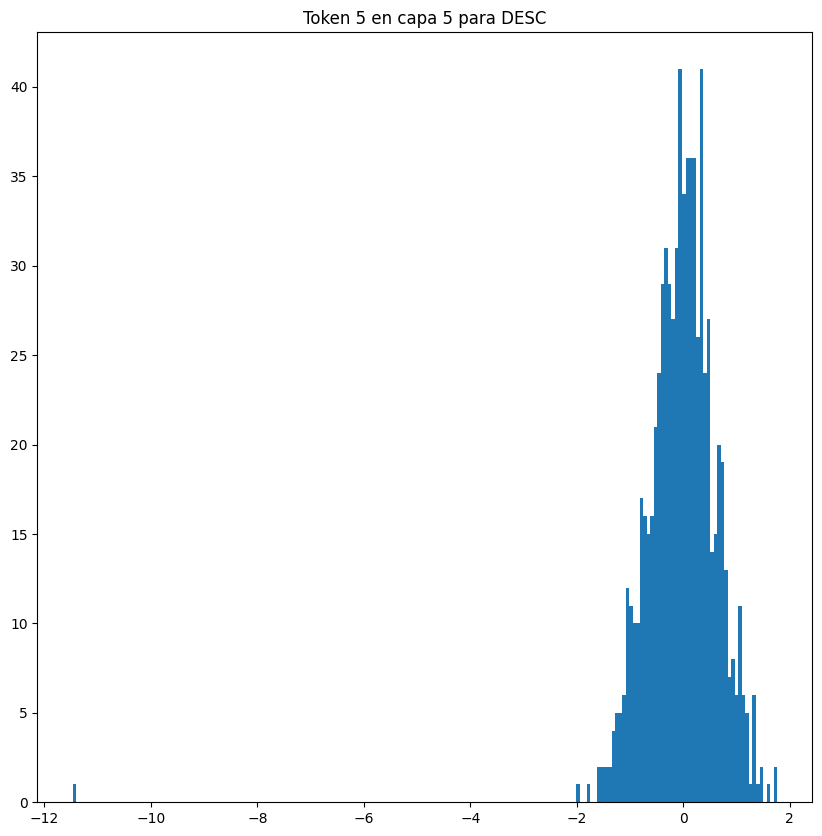

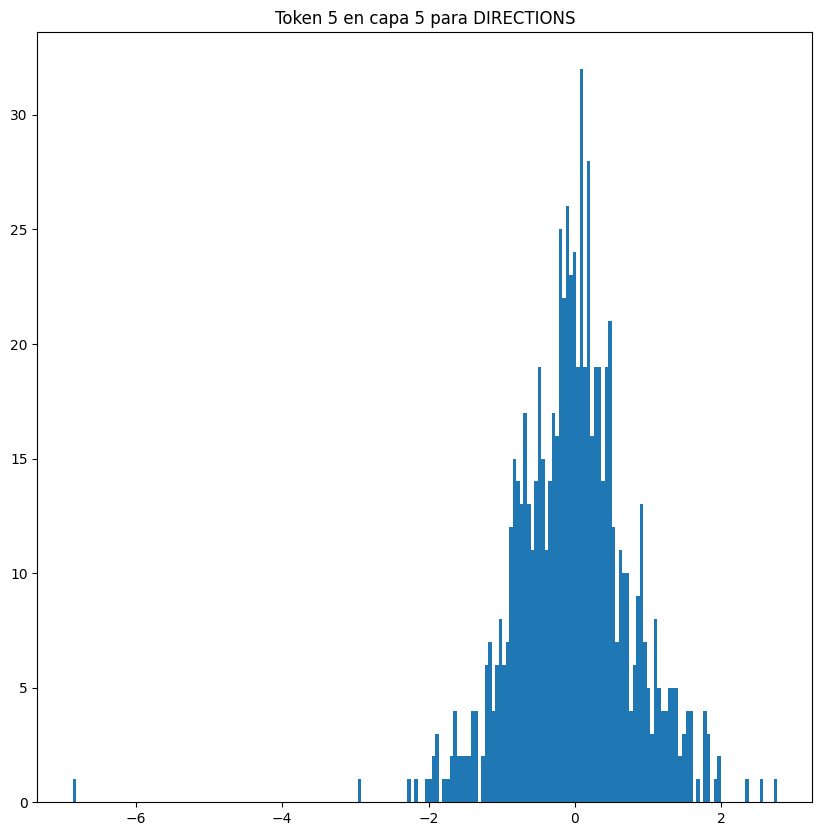

In [ ]:
#Analizamos el comportamiento de un determinado token en una determinada capa

token_i = 5
layer_i = 5
vec = hidden_states_desc[layer_i][batch_i][token_i]

# Plot the values as a histogram to show their distribution.
plt.figure(figsize=(10,10))
plt.hist(vec, bins=200)
plt.title('Token 5 en capa 5 para DESC')
plt.show()

token_i_dir = 5
layer_i_dir = 5
vec_dir = hidden_states_directions[layer_i_dir][batch_i][token_i_dir]

# Plot the values as a histogram to show their distribution.
plt.figure(figsize=(10,10))
plt.hist(vec_dir, bins=200)
plt.title('Token 5 en capa 5 para DIRECTIONS')
plt.show()

In [ ]:
#Combinamos las capas
token_embeddings_desc = torch.stack(hidden_states_desc, dim=0)
token_embeddings_directions = torch.stack(hidden_states_directions, dim=0)

#Eliminamos la dimension 1
token_embeddings_desc = torch.squeeze(token_embeddings_desc, dim=1)
token_embeddings_directions = torch.squeeze(token_embeddings_directions, dim=1)

#Intercambiamos las dimensiones 0 y 1
token_embeddings_desc = token_embeddings_desc.permute(1,0,2)
token_embeddings_directions = token_embeddings_directions.permute(1,0,2)


In [ ]:
token_embeddings_desc.size()

torch.Size([172, 13, 768])

In [ ]:
token_embeddings_directions.size()

torch.Size([219, 13, 768])

In [ ]:
#Obtenemos vectores individuales para cada token o un solo vector para representar la frase completa

#Para obtener el Word Vectors hay varios métodos: implementamos la suma de las 4 ultimas capas
token_vecs_sum_desc = []
token_vecs_sum_directions = []

for token in token_embeddings_desc:
  #Sum the vectors from the last four layers.
  sum_vec_desc = torch.sum(token[-4:], dim=0)

  #Utilizamos 'sum_vec_desc' para representar el token
  token_vecs_sum_desc.append(sum_vec_desc)

for token in token_embeddings_directions:
  #Sum the vectors from the last four layers.
  sum_vec_directions = torch.sum(token[-4:], dim=0)

  #Utilizamos 'sum_vec_directions' para representar el token
  token_vecs_sum_directions.append(sum_vec_directions)

print ('Shape for DESC is: %d x %d' % (len(token_vecs_sum_desc), len(token_vecs_sum_desc[0])))
print ('Shape for DIRECTIONS is: %d x %d' % (len(token_vecs_sum_directions), len(token_vecs_sum_directions[0])))

In [ ]:
#Obtenemos un solo vector para una frase completa

#Realizamos la media desde la segunda capa hasta la última para cada token

token_vecs_desc = hidden_states_desc[-2][0]
token_vecs_directions = hidden_states_directions[-2][0]

sentence_embedding_desc = torch.mean(token_vecs_desc, dim=0)
sentence_embedding_directions = torch.mean(token_vecs_directions, dim=0)

In [ ]:
print("Dimensión final del embedding vector para DESC:", sentence_embedding_desc.size())
print("Dimensión final del embedding vector para DIRECTIONS:", sentence_embedding_directions.size())

Dimensión final del embedding vector para DESC: torch.Size([768])
Dimensión final del embedding vector para DIRECTIONS: torch.Size([768])


In [ ]:
print(len(sentence_embedding_desc))

768


In [ ]:
#Analizamos los resultados

#Comprobamos si el valor de los vectores depende del contexto
for i, token_str in enumerate(datos['desc_bert'][52]):
  print (i, token_str)

0 [CLS]
1 i
2 didn
3 '
4 t
5 think
6 it
7 was
8 possible
9 to
10 love
11 art
12 ##ich
13 ##oke
14 ##s
15 more
16 than
17 i
18 already
19 did
20 until
21 i
22 lived
23 in
24 italy
25 .
26 there
27 they
28 harvest
29 art
30 ##ich
31 ##oke
32 ##s
33 in
34 both
35 spring
36 and
37 fall
38 ,
39 and
40 that
41 abundance
42 grace
43 ##s
44 their
45 cuisine
46 .
47 art
48 ##ich
49 ##oke
50 ##s
51 also
52 enhance
53 their
54 health
55 ,
56 as
57 they
58 stimulate
59 the
60 gall
61 ##bla
62 ##dder
63 to
64 produce
65 bile
66 ,
67 which
68 escorts
69 toxin
70 ##s
71 out
72 of
73 the
74 body
75 and
76 also
77 helps
78 break
79 down
80 fat
81 ##s
82 in
83 the
84 diet
85 .
86 here
87 ,
88 art
89 ##ich
90 ##oke
91 hearts
92 are
93 combined
94 with
95 chicken
96 ,
97 chick
98 ##pe
99 ##as
100 ,
101 and
102 olive
103 ##s
104 to
105 create
106 a
107 rich
108 ,
109 no
110 ##uri
111 ##shing
112 stew
113 ,
114 seasoned
115 with
116 a
117 pot
118 ##pour
119 ##ri
120 of
121 head
122 ##y
123 and
124 health
12

In [ ]:
#Hacemos el analisis para distintas palabras
print("art",str(token_vecs_sum_desc[11][:8]))
print("art",str(token_vecs_sum_desc[29][:8]))


art tensor([ 2.8779, -4.8018,  2.6005,  4.1566,  4.8101, -2.4712, -0.1256,  2.5234])
art tensor([ 0.1751, -0.1574,  0.0945,  0.5595, -0.4612, -0.4407,  0.0938,  0.0308])


Es posible observar que la aparición de la palabra 'art' en dos posiciones distintas del texto presenta diferentes valores de embeddings vectors. Esto significa que la misma palabra puede tener diferentes representaciones dependiendo de como se usa e interpreta en el texto. En nuestro caso, al presentar valores distintos se puede suponer que la palabra aparece en diferentes contextos o con diferentes significados.

In [ ]:
#Calculamos la similitud del coseno entre vectores
from scipy.spatial.distance import cosine

same_word = 1 - cosine(token_vecs_sum_desc[11], token_vecs_sum_desc[29])
diferent_word = 1 - cosine(token_vecs_sum_desc[11], token_vecs_sum_desc[80])

print('Vector similarity for  *similar*  meanings:  %.2f' % same_word)
print('Vector similarity for  *similar*  meanings:  %.2f' %diferent_word)

Vector similarity for  *similar*  meanings:  0.14
Vector similarity for  *similar*  meanings:  0.18


In [ ]:
#Similitud entre documentos
from sklearn.metrics.pairwise import cosine_similarity

similar_bert_desc = cosine_similarity(token_vecs_sum_desc) #Lo hacemos con variable desc porque tiene menos coste computacional
doc_bert_desc = similar_bert_desc[1]

#Calculamos la similitud del documento 1 con el resto
print(doc_bert_desc)

#Ordenamos de mayor a menor
idx_bert_desc = np.argsort(doc_bert_desc)[::-1][0:20]
valores_bert_desc = doc_bert_desc[idx_bert_desc]

print(idx_bert_desc)

[ 3.15732956e-02  1.00000024e+00  3.18023115e-02 -8.04930553e-03
 -2.43043900e-02 -2.63540167e-02 -5.71147613e-02  8.31512641e-03
 -6.43622652e-02 -5.18615507e-02  9.75599233e-03  7.54541084e-02
 -2.91721150e-02  2.32267054e-03 -6.11024126e-02 -3.02808024e-02
 -5.63303232e-02  1.89106539e-03 -4.28054556e-02  1.46131236e-02
  5.14024943e-02  2.22805068e-02 -1.35096377e-02  2.16911640e-02
 -6.30843779e-03  1.17008639e-02  5.89964762e-02  9.50776100e-01
  2.95245126e-02  9.33746874e-01  2.62603648e-02 -1.39911566e-02
  7.77218938e-02 -2.21400689e-02 -1.50690163e-02  2.33377628e-02
  1.67615749e-02 -2.36337781e-02 -6.43897429e-03 -4.99465093e-02
  2.75268890e-02 -3.24177109e-02  7.15730071e-01 -2.26216614e-02
 -5.78036010e-02 -2.45052390e-04 -2.45771930e-02 -6.62963390e-02
 -6.40355498e-02  7.47460350e-02 -2.59629115e-02  7.51422167e-01
 -5.84287085e-02 -1.66773833e-02 -2.92234588e-03  8.45182687e-02
  9.71428931e-01  3.25431339e-02  9.63823795e-01  2.82947645e-02
 -2.43449863e-03  7.44460

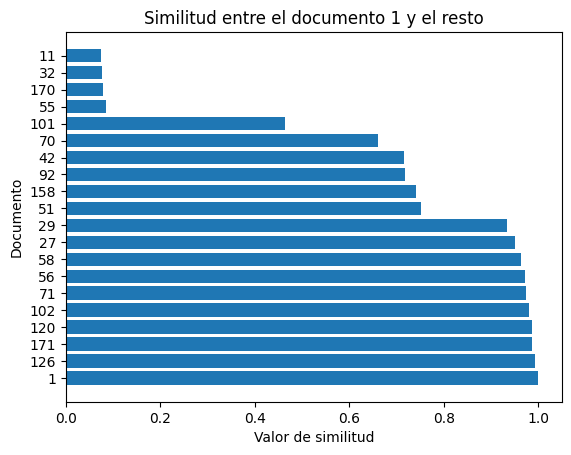

In [ ]:
#Representamos gráficamente
plt.barh(range(20), valores_bert_desc)
plt.yticks(range(20), idx_bert_desc)
plt.xlabel('Valor de similitud')
plt.ylabel('Documento')
plt.title('Similitud entre el documento 1 y el resto')
plt.show()

Analizando la gráfica destaca que los resultados obtenidos son peores que los de Word2Vec, ya que en el caso anterior aparecían numerosos documentos con una similitud prácticamente igual al documento original. La diferencia de resultados se puede deber a que estamos trabajando con un número reducido de datos y por lo tanto la precisión no es tan buena. O también puede ocurrir que como BERT si tiene en cuenta el contexto completo de los datos interprete que las recetas difieren más entre sí aunque todas sean de cocina.

### **2.4. Entrenamiento y evaluación de modelos de regresión**

En este apartado se realiza el entrenamiento y evaluación de los modelos de regresión implementando varias estrategias de aprendizaje automático. En nuestro caso se implementará Random Forest y redes neuronales.

#### Random Forest

In [ ]:
import scipy.sparse

matriz_desc_tfidf = scipy.sparse.load_npz('/content/drive/My Drive/ProyectoTD/matriz_desc_tfidf.npz')

In [ ]:
#Se ha reutilizado el codigo para los distintos casos haciendo las modificaciones necesarias
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

#Vectores de entrada del transformer
x = desc_vec

#Variable objetivo
y = datos['rating']

#Sustituimos los valores NaN por 0 para que no de error
imputer = SimpleImputer(strategy='constant', fill_value = 0)
#Ajustamos el mputador a los datos
y = imputer.fit_transform(y.values.reshape(-1, 1))

#Dividimos los datos en training y test
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 42)

#X_train = X_train.reshape(-1, 1)
#X_test = X_test.reshape(-1, 1)


#Normalizamos los datos
min_max_x = MinMaxScaler()
X_train_norm = min_max_x.fit_transform(X_train)
X_test_norm = min_max_x.transform(X_test)

min_max_y = MinMaxScaler()
y_train_norm = min_max_y.fit_transform(y_train)
y_test_norm = min_max_y.transform(y_test)

In [ ]:
#Utilizamos tecnicas de Scikit-learn

#Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

#Creamos el modelo
rf = RandomForestRegressor(random_state = 42)

#Entrenamos el modelo
rf.fit(X_train_norm, y_train)

#Evaluamos el modelo
y_predict = rf.predict(X_test_norm)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
print(y_predict)

[3.46875    3.625      3.61639123 ... 3.5625     3.95625    3.66677156]


In [ ]:

min_max_predict = MinMaxScaler()
y_predict_norm = min_max_predict.fit_transform(y_predict.reshape(-1, 1))


[[0.67687596]
 [0.75497703]
 [0.47932619]
 [0.75650842]
 [0.83920368]
 [0.12098009]
 [0.78101072]
 [0.22664625]
 [0.84992343]
 [0.74578867]
 [0.        ]
 [0.55283308]
 [0.68759571]
 [0.91271057]
 [0.85298622]
 [0.75038285]
 [0.87901991]
 [0.76416539]
 [0.50995406]
 [0.85451761]
 [0.57274119]
 [0.6906585 ]
 [0.45788668]
 [0.87442573]
 [0.84992343]
 [0.50842266]
 [0.68912711]
 [0.74732006]
 [0.8330781 ]
 [0.71669219]
 [0.82695253]
 [0.54211332]
 [0.84686064]
 [0.86676876]
 [0.74578867]
 [0.81623277]
 [0.90045942]
 [0.87901991]
 [0.55436447]
 [0.16845329]
 [0.60949464]
 [0.86064319]
 [0.70444104]
 [0.80245023]
 [0.77794793]
 [0.62327718]
 [0.95712098]
 [0.81163859]
 [0.69525268]
 [0.84073507]
 [0.84073507]
 [0.75650842]
 [0.89280245]
 [0.90811639]
 [0.83460949]
 [0.84226646]
 [0.79173047]
 [0.15773354]
 [0.68606432]
 [0.79173047]
 [0.85298622]
 [0.81316998]
 [0.64012251]
 [0.95712098]
 [0.78407351]
 [0.62174579]
 [0.86523737]
 [0.95712098]
 [0.67993874]
 [0.75803982]
 [0.86370597]
 [0.11

In [ ]:
#Calculamos algunas métricas
mse_rf = mean_squared_error(y_test, y_predict)
mae_rf = mean_absolute_error(y_test, y_predict)
print("MSE Random Forest:", mse_rf)
print("MAE Random Forest:", mae_rf)

MSE Random Forest: 1.7082001867508712
MAE Random Forest: 0.90934013144981


#### Redes neuronales

In [ ]:
#Utilizamos redes neuronales
import torch
import torch.nn as nn #Las funciones de costo que queremos minimizar estan aqui
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer

#Variables de entrada
x = sentence_embedding_desc

#Variable objetivo
y = datos['rating'][:768]

#Sustituimos los valores NaN por 0 para que no de error
imputer = SimpleImputer(strategy='constant', fill_value = 0)
#Ajustamos el mputador a los datos
y = imputer.fit_transform(y.values.reshape(-1, 1))

#Dividimos los datos en training y test
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 42)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

#Normalizamos los datos
min_max_x = MinMaxScaler()
X_train_norm = min_max_x.fit_transform(X_train)
X_test_norm = min_max_x.transform(X_test)

min_max_y = MinMaxScaler()
y_train_norm = min_max_y.fit_transform(y_train)
y_test_norm = min_max_y.transform(y_test)



In [ ]:
#Pasamos los datos a tensores
X_train_tensor = torch.tensor(X_train_norm, dtype=torch.float32) # son matrices dispersas y se convierten a tensores densos
y_train_tensor = torch.tensor(y_train_norm, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_norm, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_norm, dtype=torch.float32)

In [ ]:
#Definimos el modelo
class ModRegresion(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(ModRegresion, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu= nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, output_size)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    salida = self.fc1(x)
    salida = self.relu(salida)
    salida = self.fc2(salida)
    salida = self.sigmoid(salida)
    return salida

#Introducimos los datos
input_size = X_train.shape[1]
hidden_size = 64
output_size = 1

#Creamos el modelo
redneuronal = ModRegresion(input_size, hidden_size, output_size)

#Definimos la metrica de error y el optimizador
MSEerror = nn.MSELoss()
MAEerror = nn.L1Loss()
optimizer = optim.Adam(redneuronal.parameters(), lr=0.01)


In [ ]:
#Entrenamos el modelo
mse_list = []

for epoch in range(0, 201, 20):
  for _ in range(epoch):
    out = redneuronal(X_train_tensor)
    MSE_rn = MSEerror(out, y_train_tensor)
    MAE_rn = MAEerror(out, y_train_tensor)

    optimizer.zero_grad()
    MSE_rn.backward()
    optimizer.step()

  #Evaluamos el modelo
  with torch.no_grad():
    y_pred = redneuronal(X_test_tensor)
    MSE_rn_test = MSEerror(y_pred, y_test_tensor)
    MAE_rn_test = MAEerror(y_pred, y_test_tensor)

  mse_list.append(MSE_rn_test.item())

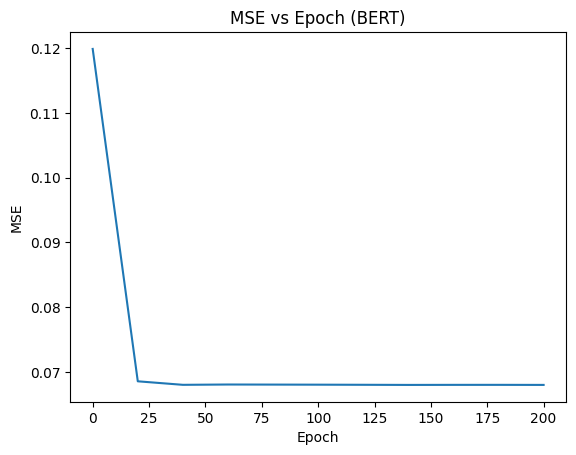

In [ ]:
n_epoch = list(range(0, 201, 20))
plt.plot(n_epoch, mse_list)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE vs Epoch (BERT)')
plt.show()

In [ ]:
#Obtenemos los errores
print("MSE Red Neuronal:", MSE_rn_test.item())
print("MAE Red Neuronal:", MAE_rn_test.item())

MSE Red Neuronal: 0.13839848339557648
MAE Red Neuronal: 0.2567049562931061


### **2.5. Fine-tuning de un modelo preentrenado con Hugging Face**

#### Variable directions

In [ ]:
!pip install transformers datasets torch

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import torch
import numpy as np
from sklearn.metrics import mean_squared_error
from datasets import Dataset
import pyarrow as pa

In [ ]:
datos_reducidos = datos.sample(n=10000, random_state=42)  # Se eligen 10.000 datos de los 20.130
datos_reducidos = datos_reducidos.dropna(subset=['directions', 'rating']) # Se selecciona la variable directions y rating
X = datos_reducidos['directions']
y = datos_reducidos['rating']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_features = datos_reducidos.select_dtypes(include=['number']).columns.tolist()

In [ ]:
# Se usa DistilBERT por simplicidad a la hora de ejecutar
model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=1) # Con num_labels=1 lo configuramos para tarea de regresión

# Convertir datos de entrenamiento y validación en tablas para procesamiento más rápido
train_table = pa.Table.from_pydict({"text": X_train.astype(str).tolist(), "labels": y_train.astype(float).tolist()})
val_table = pa.Table.from_pydict({"text": X_val.astype(str).tolist(), "labels": y_val.astype(float).tolist()})

# Convertir tablas en datasets de Hugging Face para preprocesamiento más fácil
train_dataset = Dataset(train_table)
val_dataset = Dataset(val_table)

In [ ]:
# Función de tokenización para DistilBERT
def preprocess_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=128) # Ajustamos para tener 128 tokens

# Tokenizamos los datasets
train_dataset = train_dataset.map(preprocess_function, batched=True)
val_dataset = val_dataset.map(preprocess_function, batched=True)

# Calculamos métricas para evaluar el modelo
def compute_metrics(pred):
    labels = pred.label_ids # Etiquetas verdaderas
    preds = pred.predictions.squeeze() # Las que predice el modelo

    labels = np.nan_to_num(labels, nan=np.nanmean(labels)) # Reemplaza valores NaN por la media
    preds = np.nan_to_num(preds, nan=np.nanmean(preds))

    mse = mean_squared_error(labels, preds) # Calculo MSE
    return {"mse": mse}

# Configuramos los parámetros de entrenamiento
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=1, # 1 época para que sea más rápido
    per_device_train_batch_size=8,
    per_device_eval_batch_size=32,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch",
    fp16=True,
)

# Entrenamos al modelo
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
)
trainer.train()

#### Variable desc

Mismo código que en el caso anterior, con la salvedad de que en los datos se indica la variable *desc* en lugar de *directions*

In [ ]:
datos_reducidos = datos.sample(n=10000, random_state=42)
datos_reducidos = datos_reducidos.dropna(subset=['desc', 'rating'])
X = datos_reducidos['desc']
y = datos_reducidos['rating']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_features = datos_reducidos.select_dtypes(include=['number']).columns.tolist()

In [ ]:
# Se usa DistilBERT por simplicidad a la hora de ejecutar
model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=1) # Con num_labels=1 lo configuramos para tarea de regresión

# Convertir datos de entrenamiento y validación en tablas para procesamiento más rápido
train_table = pa.Table.from_pydict({"text": X_train.astype(str).tolist(), "labels": y_train.astype(float).tolist()})
val_table = pa.Table.from_pydict({"text": X_val.astype(str).tolist(), "labels": y_val.astype(float).tolist()})

# Convertir tablas en datasets de Hugging Face para preprocesamiento más fácil
train_dataset = Dataset(train_table)
val_dataset = Dataset(val_table)

In [ ]:
# Función de tokenización para DistilBERT
def preprocess_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=128) # Ajustamos para tener 128 tokens

# Tokenizamos los datasets
train_dataset = train_dataset.map(preprocess_function, batched=True)
val_dataset = val_dataset.map(preprocess_function, batched=True)

# Calculamos métricas para evaluar el modelo
def compute_metrics(pred):
    labels = pred.label_ids # Etiquetas verdaderas
    preds = pred.predictions.squeeze() # Las que predice el modelo

    labels = np.nan_to_num(labels, nan=np.nanmean(labels)) # Reemplaza valores NaN por la media
    preds = np.nan_to_num(preds, nan=np.nanmean(preds))

    mse = mean_squared_error(labels, preds) # Calculo MSE
    return {"mse": mse}

# Configuramos los parámetros de entrenamiento
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=1, # 1 época para que sea más rápido
    per_device_train_batch_size=8,
    per_device_eval_batch_size=32,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch",
    fp16=True,
)

# Entrenamos al modelo
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
)
trainer.train()

## **3. Extensión**

### **3.1. Summarizer**

In [ ]:
!pip install --upgrade transformers

In [ ]:
from transformers import pipeline, AutoTokenizer

# Elegimos modelo que realiza el resumen
tokenizer = AutoTokenizer.from_pretrained('google/pegasus-xsum')
summarizer = pipeline("summarization", model='google/pegasus-xsum')

In [ ]:
datos_reducidos = datos.iloc[:5] # Se eligen solo los 5 primeros documentos
# Función que realiza el resumen del texto
def summarize_directions(directions):
    if isinstance(directions, list) and not directions:
        return ""
    if pd.isna(directions).any():
        return ""

    if isinstance(directions, list):
        summaries = [summarizer(str(d), max_length=100, min_length=5, do_sample=False)[0]['summary_text'] for d in directions if d]
        return " ".join(summaries)
    elif isinstance(directions, str):
        return summarizer(directions, max_length=100, min_length=5, do_sample=False)[0]['summary_text']
    else:
        return ""

# Se aplica a los datos en la variable directions el resumen
datos_reducidos['directions_summary'] = datos_reducidos['directions'].apply(summarize_directions)

# Se muestran los datos con esta nueva columna añadida
print(datos_reducidos['directions_summary'])
datos_reducidos.head()

In [ ]:
# Se imprime el texto resumido (en este caso el 1 a modo de ejemplo) en columnas de 10 palabras para una mejor visualización
summary_text = datos_reducidos['directions_summary'][1]
words = summary_text.split()

columns = [" ".join(words[i:i+10]) for i in range(0, len(words), 10)]

for column in columns:
    print(column)

In [ ]:
# Se imprime el texto original en columnas de 10 palabras para visualizarlo mejor
for summary in datos['directions'][1]:
    words = summary.split()

    columns = [" ".join(words[i:i+10]) for i in range(0, len(words), 10)]

    for column in columns:
        print(column)

    print()

### **3.2. TF-IDF+KMeans y Word Cloud**

#### TF-IDF+KMeans

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
# Creamos nueva columna que agrupa las variables directions, desc y categories
datos['texto_unido'] = datos['directions'].astype(str) + " " + datos['desc'].astype(str) + " " + datos['categories'].astype(str)

# Convertimos texto en representación númerica para su posterior procesamiento
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000) # Nos quedamos con las 5.000 palabras más frecuentes
X_tfidf = vectorizer.fit_transform(datos['texto_unido']) # Se crea matriz TF-IDF

# Se implementa KMeans con 8 clusters
num_clusters = 8
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
kmeans.fit(X_tfidf)

# Se obtienen los centroides de cada cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
import matplotlib.pyplot as plt
import numpy as np

# Interpretamos los datos con un gráfico de barras para cada cluster
fig, axes = plt.subplots(2, 4, figsize=(15, 10))

for i, ax in enumerate(axes.flatten()):
    topic_words = {terms[ind]: kmeans.cluster_centers_[i][ind] for ind in order_centroids[i, :10]}

    words = list(topic_words.keys())
    weights = list(topic_words.values())

    ax.barh(words, weights, color='skyblue')
    ax.set_title(f"Cluster {i}")
    ax.invert_yaxis()

plt.tight_layout()
plt.show()

#### Word Cloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.colors as mcolors

In [ ]:
# Creamos los colores para las palabras
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

# Creamos la figura
fig, axes = plt.subplots(2, 4, figsize=(15, 8), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)

    # Se obtienen las palabras más frecuentes
    topic_words = {terms[ind]: kmeans.cluster_centers_[i][ind] for ind in order_centroids[i, :30]}  # Se seleccionan 30

    # Configuramos Word Cloud
    cloud = WordCloud(
        background_color='white',
        width=800,
        height=600,
        max_words=30,
        colormap='viridis',
        prefer_horizontal=0.8,
        contour_color='steelblue',
        contour_width=1.5
    )

    cloud.generate_from_frequencies(topic_words) # Genera la nube

    # La mostramos
    plt.imshow(cloud, interpolation="bilinear")
    plt.title(f"Cluster {i}", fontdict=dict(size=16))
    plt.axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()
plt.show()

### Generamos gráficas:

#### Random Forest para TF-IDF

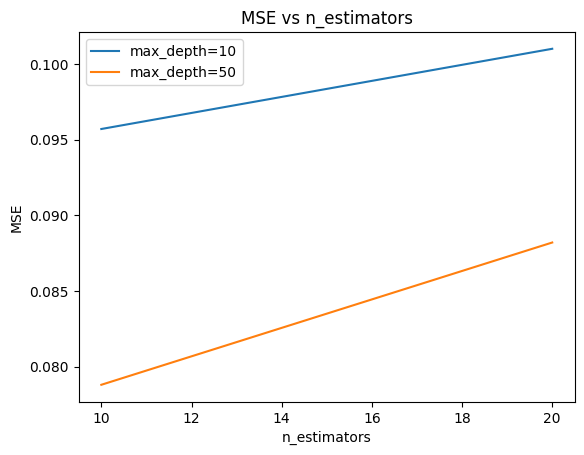

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

datos = {
    'n_estimators': [10, 10, 20, 20],
    'max_depth': [10, 50, 50, 10],
    'MSE': [0.0957, 0.0788, 0.0882, 0.101],
    'MAE': [0.1877, 0.17, 0.1767, 0.2]
}

df = pd.DataFrame(datos)

#MSE
plt.plot()
for max_depth in df['max_depth'].unique():
    df_filtered = df[df['max_depth'] == max_depth]
    plt.plot(df_filtered['n_estimators'], df_filtered['MSE'], label=f'max_depth={max_depth}')
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.title('MSE vs n_estimators')
plt.legend()


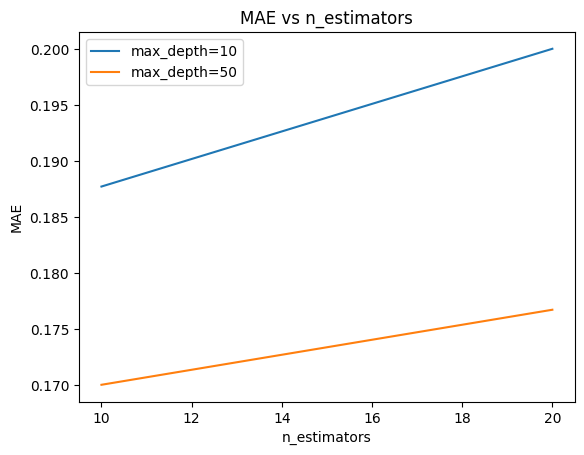

In [ ]:
#MAE
plt.plot()
for max_depth in df['max_depth'].unique():
    df_filtered = df[df['max_depth'] == max_depth]
    plt.plot(df_filtered['n_estimators'], df_filtered['MAE'], label=f'max_depth={max_depth}')
plt.xlabel('n_estimators')
plt.ylabel('MAE')
plt.title('MAE vs n_estimators')
plt.legend()

Text(50.722222222222214, 0.5, 'Max_depth')

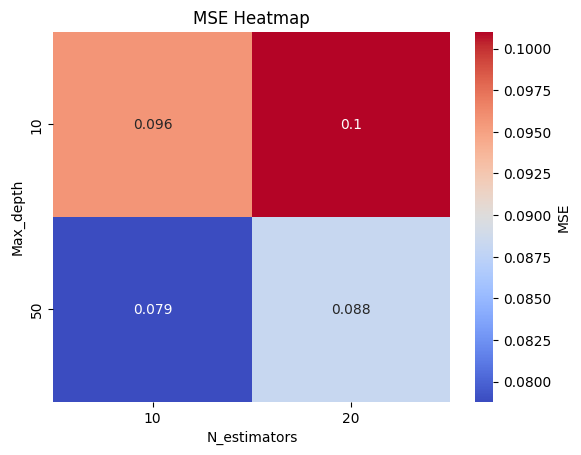

In [ ]:
# Heatmap
pivot_mse = df.pivot(index="max_depth", columns="n_estimators", values="MSE")

# MSE Heatmap
plt.plot()
sns.heatmap(pivot_mse, annot=True, cmap="coolwarm", cbar_kws={'label': 'MSE'})
plt.title("MSE")
plt.xlabel("N_estimators")
plt.ylabel("Max_depth")

Text(50.722222222222214, 0.5, 'Max_depth')

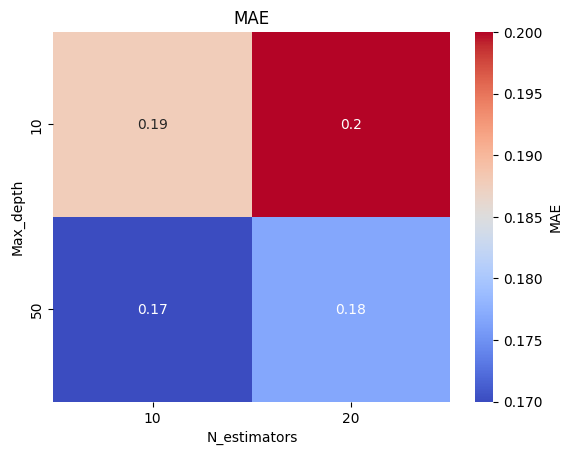

In [ ]:
# Heatmap
pivot_mae = df.pivot(index="max_depth", columns="n_estimators", values="MAE")

# MAE Heatmap
plt.plot()
sns.heatmap(pivot_mae, annot=True, cmap="coolwarm", cbar_kws={'label': 'MAE'})
plt.title("MAE")
plt.xlabel("N_estimators")
plt.ylabel("Max_depth")

#### Random Forest para Word2Vec

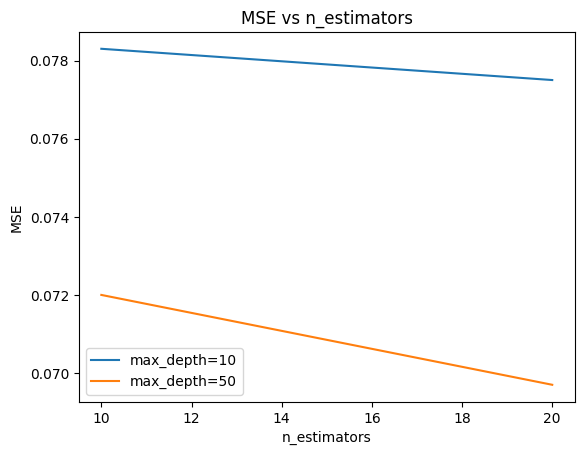

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

datos = {
    'n_estimators': [10, 10, 20, 20],
    'max_depth': [10, 50, 50, 10],
    'MSE': [0.0783, 0.072, 0.0697, 0.0775],
    'MAE': [0.1708, 0.1865, 0.18394, 0.1696]
}

df = pd.DataFrame(datos)

#MSE
plt.plot()
for max_depth in df['max_depth'].unique():
    df_filtered = df[df['max_depth'] == max_depth]
    plt.plot(df_filtered['n_estimators'], df_filtered['MSE'], label=f'max_depth={max_depth}')
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.title('MSE vs n_estimators')
plt.legend()

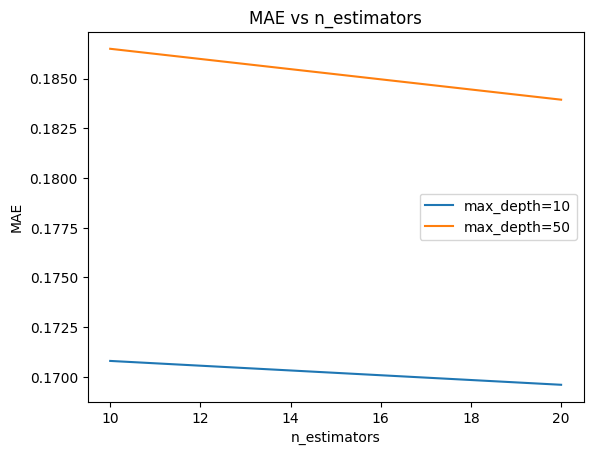

In [ ]:
#MAE
plt.plot()
for max_depth in df['max_depth'].unique():
    df_filtered = df[df['max_depth'] == max_depth]
    plt.plot(df_filtered['n_estimators'], df_filtered['MAE'], label=f'max_depth={max_depth}')
plt.xlabel('n_estimators')
plt.ylabel('MAE')
plt.title('MAE vs n_estimators')
plt.legend()

Text(50.722222222222214, 0.5, 'Max_depth')

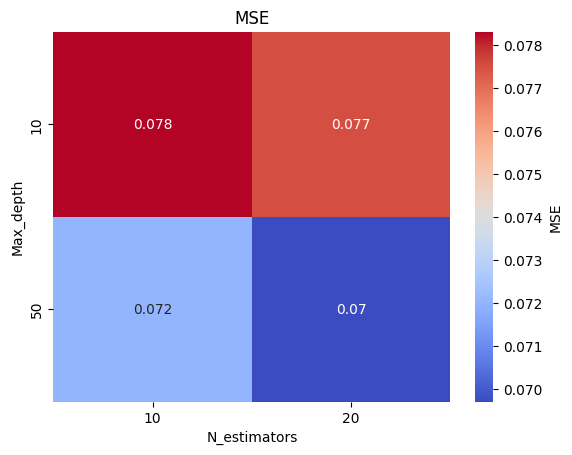

In [ ]:
# Heatmap
pivot_mse = df.pivot(index="max_depth", columns="n_estimators", values="MSE")

# MSE Heatmap
plt.plot()
sns.heatmap(pivot_mse, annot=True, cmap="coolwarm", cbar_kws={'label': 'MSE'})
plt.title("MSE")
plt.xlabel("N_estimators")
plt.ylabel("Max_depth")

Text(50.722222222222214, 0.5, 'Max_depth')

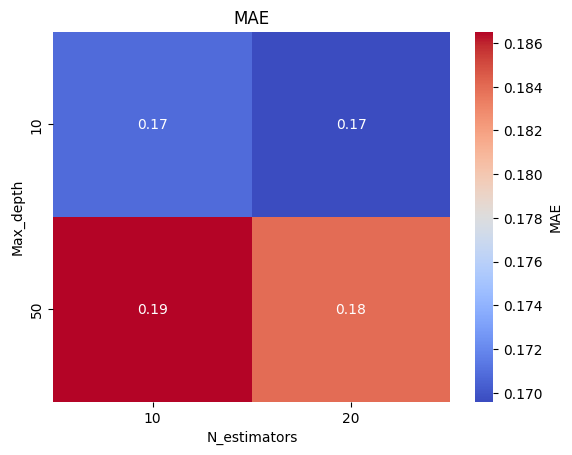

In [ ]:
# Heatmap
pivot_mae = df.pivot(index="max_depth", columns="n_estimators", values="MAE")

# MAE Heatmap
plt.plot()
sns.heatmap(pivot_mae, annot=True, cmap="coolwarm", cbar_kws={'label': 'MAE'})
plt.title("MAE")
plt.xlabel("N_estimators")
plt.ylabel("Max_depth")

#### Random Forest para BERT

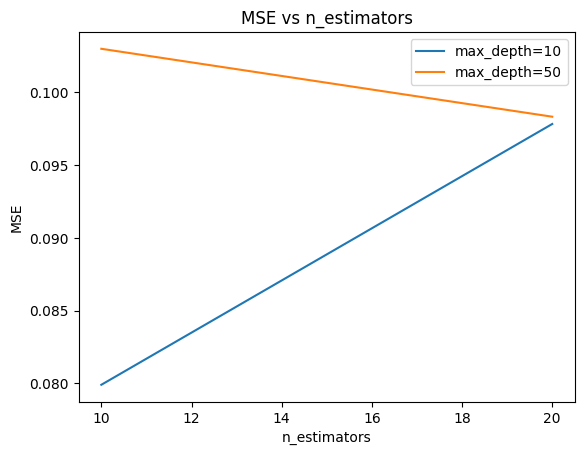

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

datos = {
    'n_estimators': [10, 10, 20, 20],
    'max_depth': [10, 50, 50, 10],
    'MSE': [0.0799, 0.103, 0.09833, 0.09783],
    'MAE': [0.1802, 0.22106, 0.21905, 0.2005]
}

df = pd.DataFrame(datos)

#MSE
plt.plot()
for max_depth in df['max_depth'].unique():
    df_filtered = df[df['max_depth'] == max_depth]
    plt.plot(df_filtered['n_estimators'], df_filtered['MSE'], label=f'max_depth={max_depth}')
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.title('MSE vs n_estimators')
plt.legend()

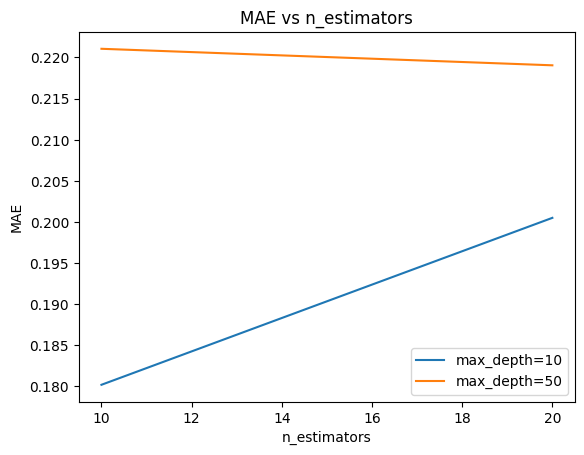

In [ ]:
#MAE
plt.plot()
for max_depth in df['max_depth'].unique():
    df_filtered = df[df['max_depth'] == max_depth]
    plt.plot(df_filtered['n_estimators'], df_filtered['MAE'], label=f'max_depth={max_depth}')
plt.xlabel('n_estimators')
plt.ylabel('MAE')
plt.title('MAE vs n_estimators')
plt.legend()

Text(50.722222222222214, 0.5, 'Max_depth')

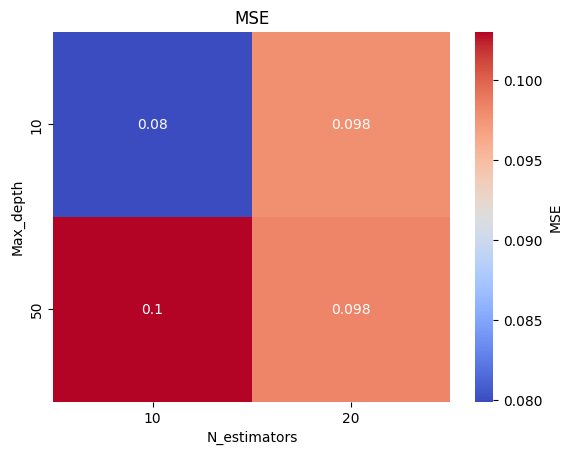

In [ ]:
# Heatmap
pivot_mse = df.pivot(index="max_depth", columns="n_estimators", values="MSE")

# MSE Heatmap
plt.plot()
sns.heatmap(pivot_mse, annot=True, cmap="coolwarm", cbar_kws={'label': 'MSE'})
plt.title("MSE")
plt.xlabel("N_estimators")
plt.ylabel("Max_depth")

Text(50.722222222222214, 0.5, 'Max_depth')

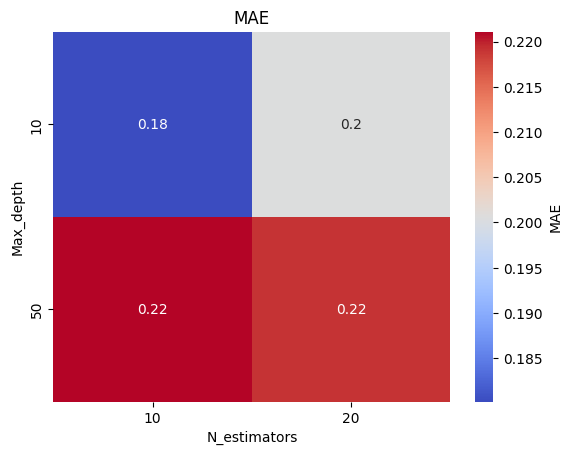

In [ ]:
# Heatmap
pivot_mae = df.pivot(index="max_depth", columns="n_estimators", values="MAE")

# MAE Heatmap
plt.plot()
sns.heatmap(pivot_mae, annot=True, cmap="coolwarm", cbar_kws={'label': 'MAE'})
plt.title("MAE")
plt.xlabel("N_estimators")
plt.ylabel("Max_depth")

#### Redes neuronales para TF-IDF

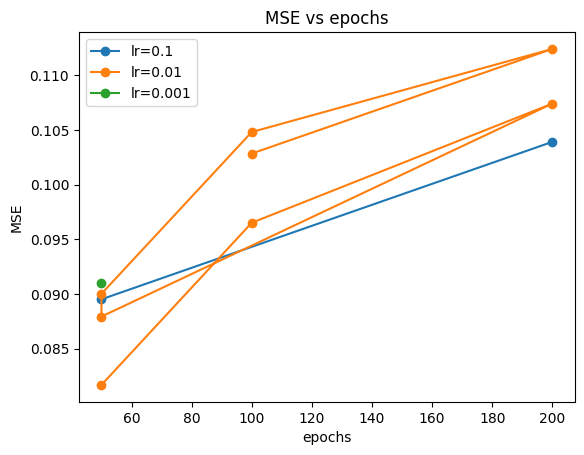

In [ ]:
# Datos
data = {
    'lr': [0.1, 0.01, 0.001, 0.01, 0.01, 0.01, 0.01, 0.1, 0.01, 0.01, 0.01],
    'epochs': [50, 50, 50, 100, 200, 50, 50, 200, 100, 200, 100],
    'hidden_size': [32, 32, 32, 32, 32, 64, 128, 128, 64, 64, 128],
    'MSE': [0.0895, 0.08167, 0.091, 0.0965, 0.1074, 0.08792, 0.09, 0.1039, 0.1048, 0.1124, 0.10283],
    'MAE': [0.2082, 0.1951, 0.2561, 0.2089, 0.22, 0.2044, 0.2032, 0.228, 0.2147, 0.2247, 0.21615]
}

df = pd.DataFrame(data)

# MSE
plt.plot()
for lr in df['lr'].unique():
    subset = df[df['lr'] == lr]
    plt.plot(subset['epochs'], subset['MSE'], marker='o', label=f"lr={lr}")
plt.title('MSE vs epochs')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.legend()

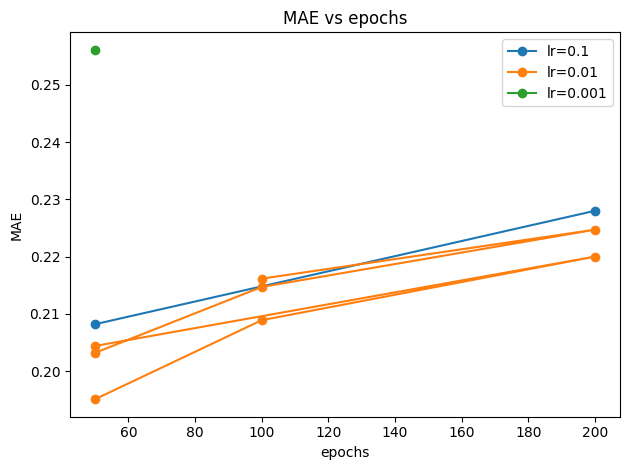

In [ ]:
# MAE
plt.plot()
for lr in df['lr'].unique():
    subset = df[df['lr'] == lr]
    plt.plot(subset['epochs'], subset['MAE'], marker='o', label=f"lr={lr}")
plt.title('MAE vs epochs')
plt.xlabel('epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

Text(50.722222222222214, 0.5, 'hidden_size')

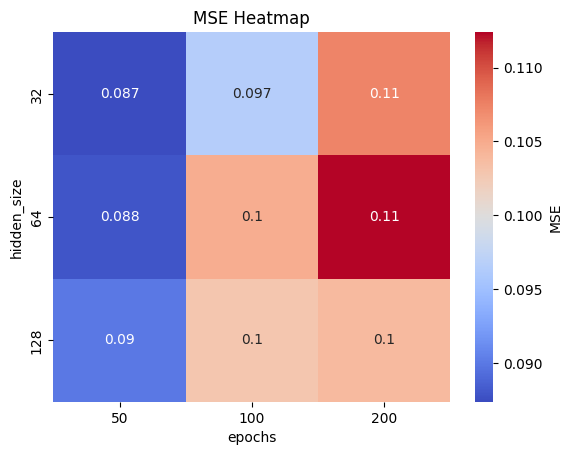

In [ ]:
# Heatmap para MSE y MAE con epochs y hidden_size
pivot_mse = df.pivot_table(values="MSE", index="hidden_size", columns="epochs")

# MSE Heatmap
plt.plot()
sns.heatmap(pivot_mse, annot=True, cmap="coolwarm", cbar_kws={'label': 'MSE'})
plt.title("MSE Heatmap")
plt.xlabel("epochs")
plt.ylabel("hidden_size")

Text(50.722222222222214, 0.5, 'Max_depth')

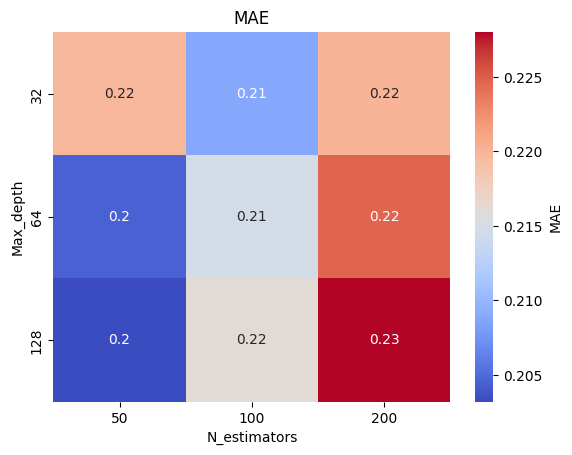

In [ ]:
# Heatmap
pivot_mae = df.pivot_table(index="hidden_size", columns="epochs", values="MAE")

# MAE Heatmap
plt.plot()
sns.heatmap(pivot_mae, annot=True, cmap="coolwarm", cbar_kws={'label': 'MAE'})
plt.title("MAE")
plt.xlabel("N_estimators")
plt.ylabel("Max_depth")

#### Redes neuronales para Word2Vec

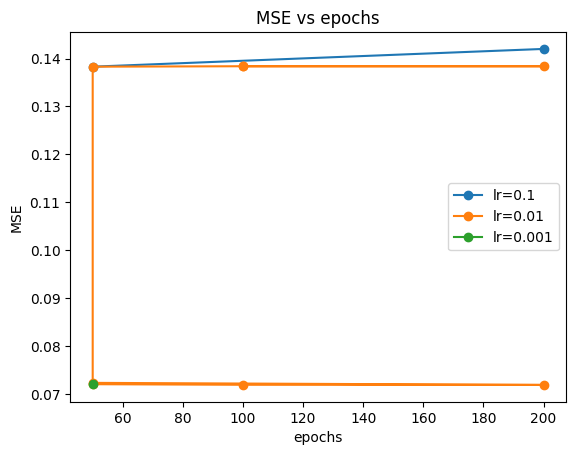

In [ ]:
# Datos
data = {
    'lr': [0.1, 0.01, 0.001, 0.01, 0.01, 0.01, 0.01, 0.1, 0.01, 0.01, 0.01],
    'epochs': [50, 50, 50, 100, 200, 50, 50, 200, 100, 200, 100],
    'hidden_size': [32, 32, 32, 32, 32, 64, 128, 128, 64, 64, 128],
    'MSE': [0.1383, 0.07212, 0.07216, 0.072, 0.07197, 0.0724, 0.1383, 0.142, 0.13839, 0.13839, 0.13839],
    'MAE': [0.2567, 0.1808, 0.1828, 0.1837, 0.18316, 0.1901, 0.2567, 0.2675, 0.2567, 0.2567, 0.2567]
}

df = pd.DataFrame(data)

# MSE
plt.plot()
for lr in df['lr'].unique():
    subset = df[df['lr'] == lr]
    plt.plot(subset['epochs'], subset['MSE'], marker='o', label=f"lr={lr}")
plt.title('MSE vs epochs')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.legend()

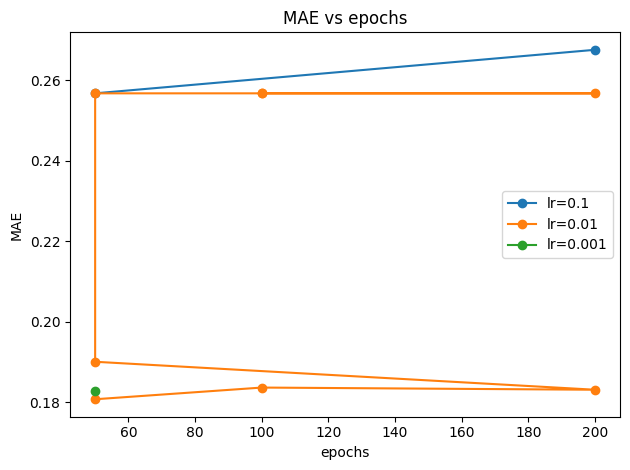

In [ ]:
# MAE
plt.plot()
for lr in df['lr'].unique():
    subset = df[df['lr'] == lr]
    plt.plot(subset['epochs'], subset['MAE'], marker='o', label=f"lr={lr}")
plt.title('MAE vs epochs')
plt.xlabel('epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

Text(50.722222222222214, 0.5, 'hidden_size')

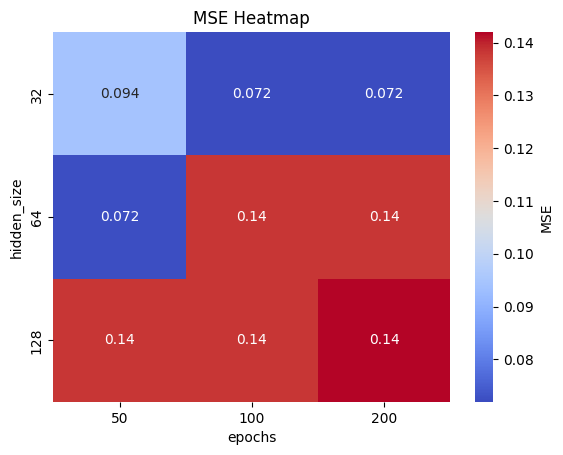

In [ ]:
# Heatmap para MSE y MAE con epochs y hidden_size
pivot_mse = df.pivot_table(values="MSE", index="hidden_size", columns="epochs")

# MSE Heatmap
plt.plot()
sns.heatmap(pivot_mse, annot=True, cmap="coolwarm", cbar_kws={'label': 'MSE'})
plt.title("MSE Heatmap")
plt.xlabel("epochs")
plt.ylabel("hidden_size")

Text(50.722222222222214, 0.5, 'Max_depth')

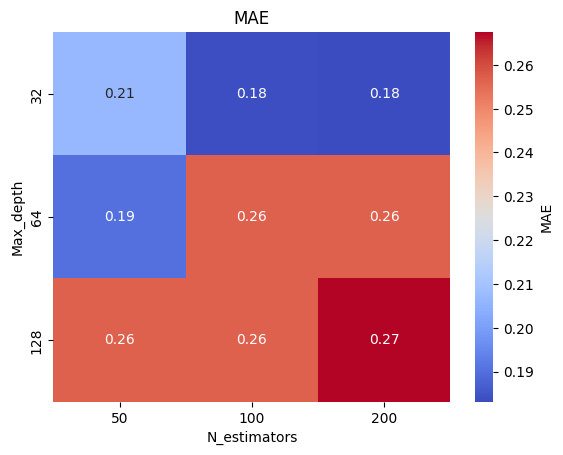

In [ ]:
# Heatmap
pivot_mae = df.pivot_table(index="hidden_size", columns="epochs", values="MAE") # Changed positional arguments to keyword arguments

# MAE Heatmap
plt.plot()
sns.heatmap(pivot_mae, annot=True, cmap="coolwarm", cbar_kws={'label': 'MAE'})
plt.title("MAE")
plt.xlabel("N_estimators")
plt.ylabel("Max_depth")

#### Redes Neuronales para BERT

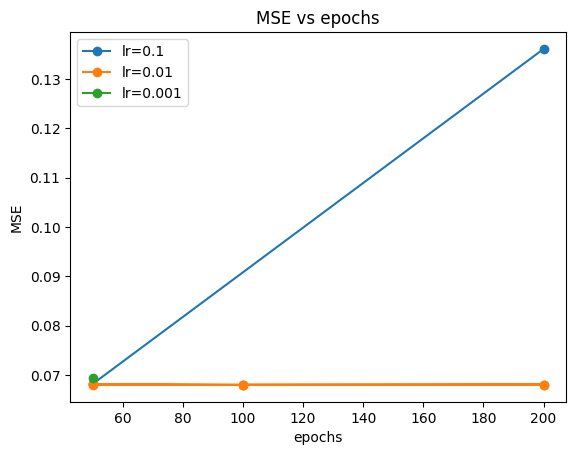

In [ ]:
# Datos
data = {
    'lr': [0.1, 0.01, 0.001, 0.01, 0.01, 0.01, 0.01, 0.1, 0.01, 0.01, 0.01],
    'epochs': [50, 50, 50, 100, 200, 50, 50, 200, 100, 200, 100],
    'hidden_size': [32, 32, 32, 32, 32, 64, 128, 128, 64, 64, 128],
    'MSE': [0.0682, 0.06812, 0.0694, 0.068, 0.06803, 0.068, 0.06811, 0.1361, 0.068, 0.06803, 0.06802],
    'MAE': [0.1639, 0.1768, 0.19227, 0.1667, 0.1665, 0.1719, 0.16468, 0.26106, 0.16645, 0.16602, 0.16635]
}

df = pd.DataFrame(data)

# MSE
plt.plot()
for lr in df['lr'].unique():
    subset = df[df['lr'] == lr]
    plt.plot(subset['epochs'], subset['MSE'], marker='o', label=f"lr={lr}")
plt.title('MSE vs epochs')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.legend()

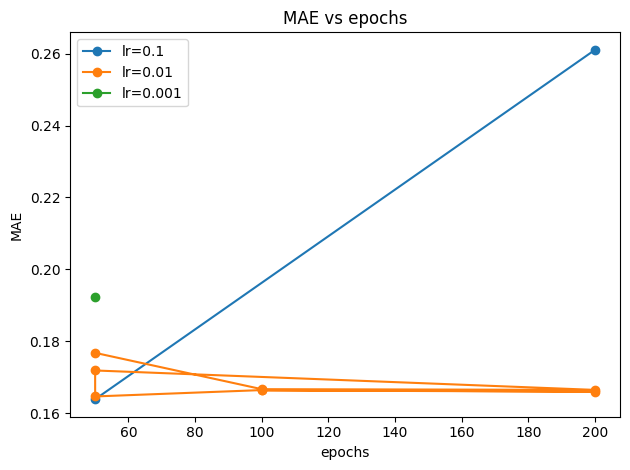

In [ ]:
# MAE
plt.plot()
for lr in df['lr'].unique():
    subset = df[df['lr'] == lr]
    plt.plot(subset['epochs'], subset['MAE'], marker='o', label=f"lr={lr}")
plt.title('MAE vs epochs')
plt.xlabel('epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

Text(50.722222222222214, 0.5, 'hidden_size')

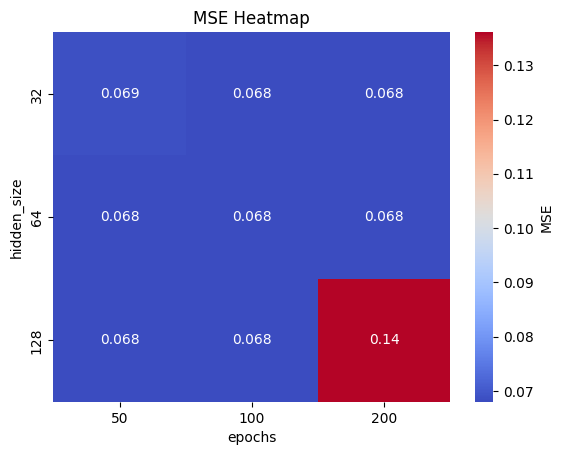

In [ ]:
# Heatmap para MSE y MAE con epochs y hidden_size
pivot_mse = df.pivot_table(values="MSE", index="hidden_size", columns="epochs")

# MSE Heatmap
plt.plot()
sns.heatmap(pivot_mse, annot=True, cmap="coolwarm", cbar_kws={'label': 'MSE'})
plt.title("MSE Heatmap")
plt.xlabel("epochs")
plt.ylabel("hidden_size")

Text(50.722222222222214, 0.5, 'Max_depth')

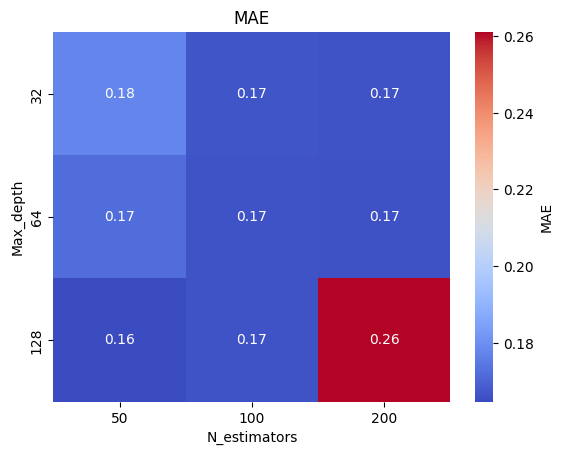

In [ ]:
# Heatmap
pivot_mae = df.pivot_table(index="hidden_size", columns="epochs", values="MAE") # Changed positional arguments to keyword arguments

# MAE Heatmap
plt.plot()
sns.heatmap(pivot_mae, annot=True, cmap="coolwarm", cbar_kws={'label': 'MAE'})
plt.title("MAE")
plt.xlabel("N_estimators")
plt.ylabel("Max_depth")